In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot(df, label=None, hue=None):
    plt.figure(figsize=(20, 15))
    sns.set_palette("husl")
    sns.set_context("notebook", font_scale=2.2, rc={"lines.linewidth": 2.5})
    if hue:
        sns.lineplot(x='date', y='count', hue=hue, data=df)
        plt.legend(title='VenueType',  loc='upper right')
    else:
        sns.lineplot(x='date', y='count', data=df)
        # plt.legend(title='VenueType', bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.xticks(rotation=45)
    plt.title(f'Checkin count per day {label}' if label else 'Checkin count per day')
    plt.xlabel('Date')
    plt.ylabel('Checkin count')
    plt.savefig(f'figs/{label}.png' if label else 'figs/plot.png', bbox_inches='tight')
    plt.show()

In [3]:
def get_plot_df(checkin_data):
    checkin_data['CheckinTime'] = pandas.to_datetime(checkin_data['CheckinTime'])
    checkin_data['date'] = checkin_data['CheckinTime'].dt.date
    visited_by_type_df = checkin_data[['date','UserId','VenueType']].copy()

    visited_by_type_df['count'] = 1
    visited_by_type_df = visited_by_type_df.groupby(['date','VenueType']).count().reset_index()
    visited_by_type_df = visited_by_type_df[["date","VenueType","count"]]
    visited_by_type_df = visited_by_type_df.sort_values(by='date').reset_index(drop=True)

    total_df = visited_by_type_df.groupby(['date']).sum().reset_index()

    total_df = total_df[["date","count"]]
    visited_by_type_df = visited_by_type_df[["date","count","VenueType"]]
    return  visited_by_type_df, total_df
    

In [ ]:
def plot_all(visit_df, total_df, name=''):
    plot(total_df, label=f'{name}_Total_Visits', hue=None)
    plot(visit_df, label=f'{name}_Visited_by_Type', hue='VenueType')
    plot(visit_df[visit_df['VenueType'] == 'Workplace'], label=f'{name}_Workplace')
    plot(visit_df[visit_df['VenueType'] == 'Restaurant'], label=f'{name}_Restaurant')
    plot(visit_df[visit_df['VenueType'] == 'Pub'], label=f'{name}_Pub')
    plot(visit_df[visit_df['VenueType'] == 'Apartment'], label=f'{name}_Apartment')

In [5]:
def plot_file(file_name, data_dir = 'city_global_2/data-delivered-may-21'):
    checkin_data = pandas.read_csv(f'{data_dir}/{file_name}', sep='\t')
    visit_df, total_df = get_plot_df(checkin_data)
    plot_all(visit_df, total_df, name=file_name.split('.')[0])

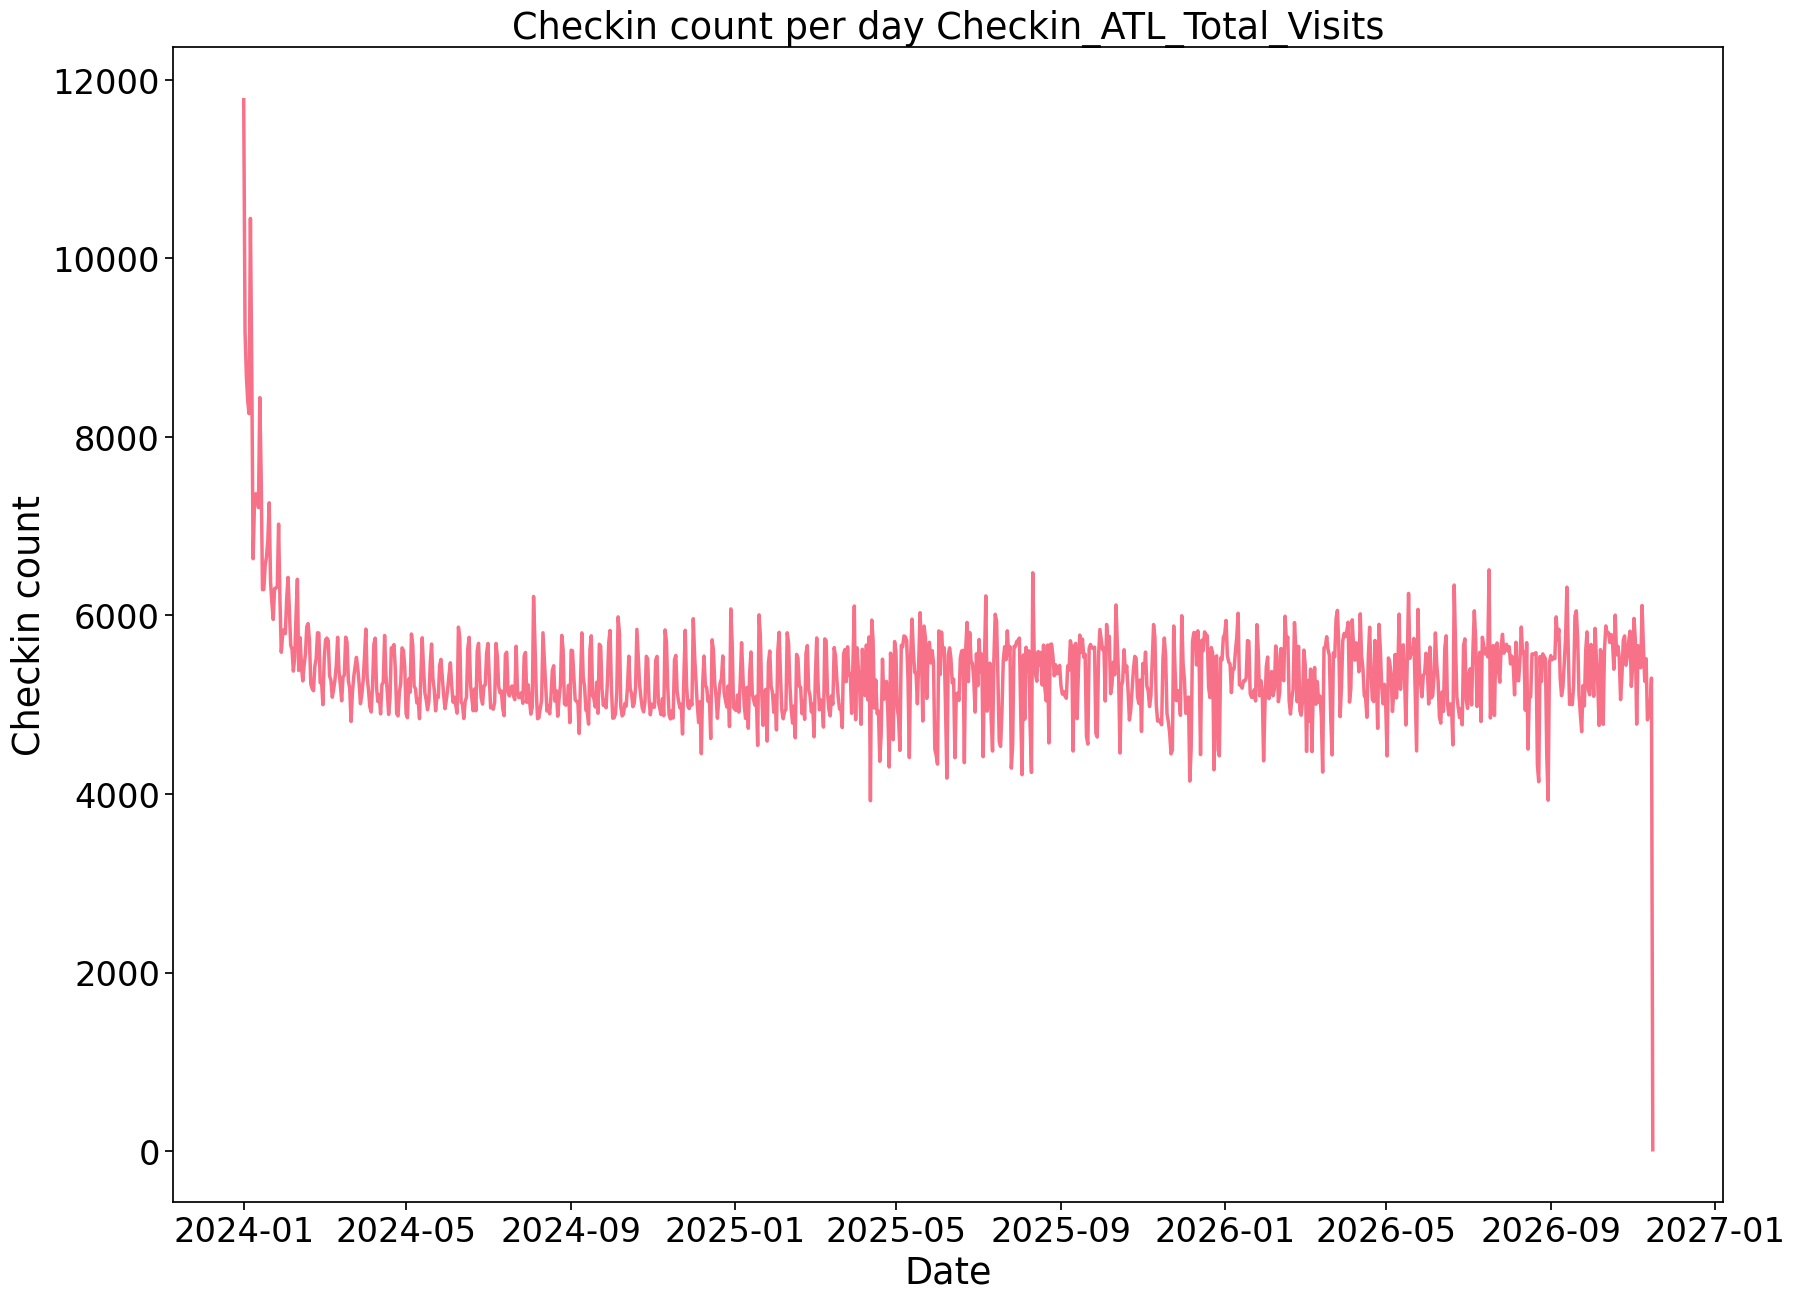

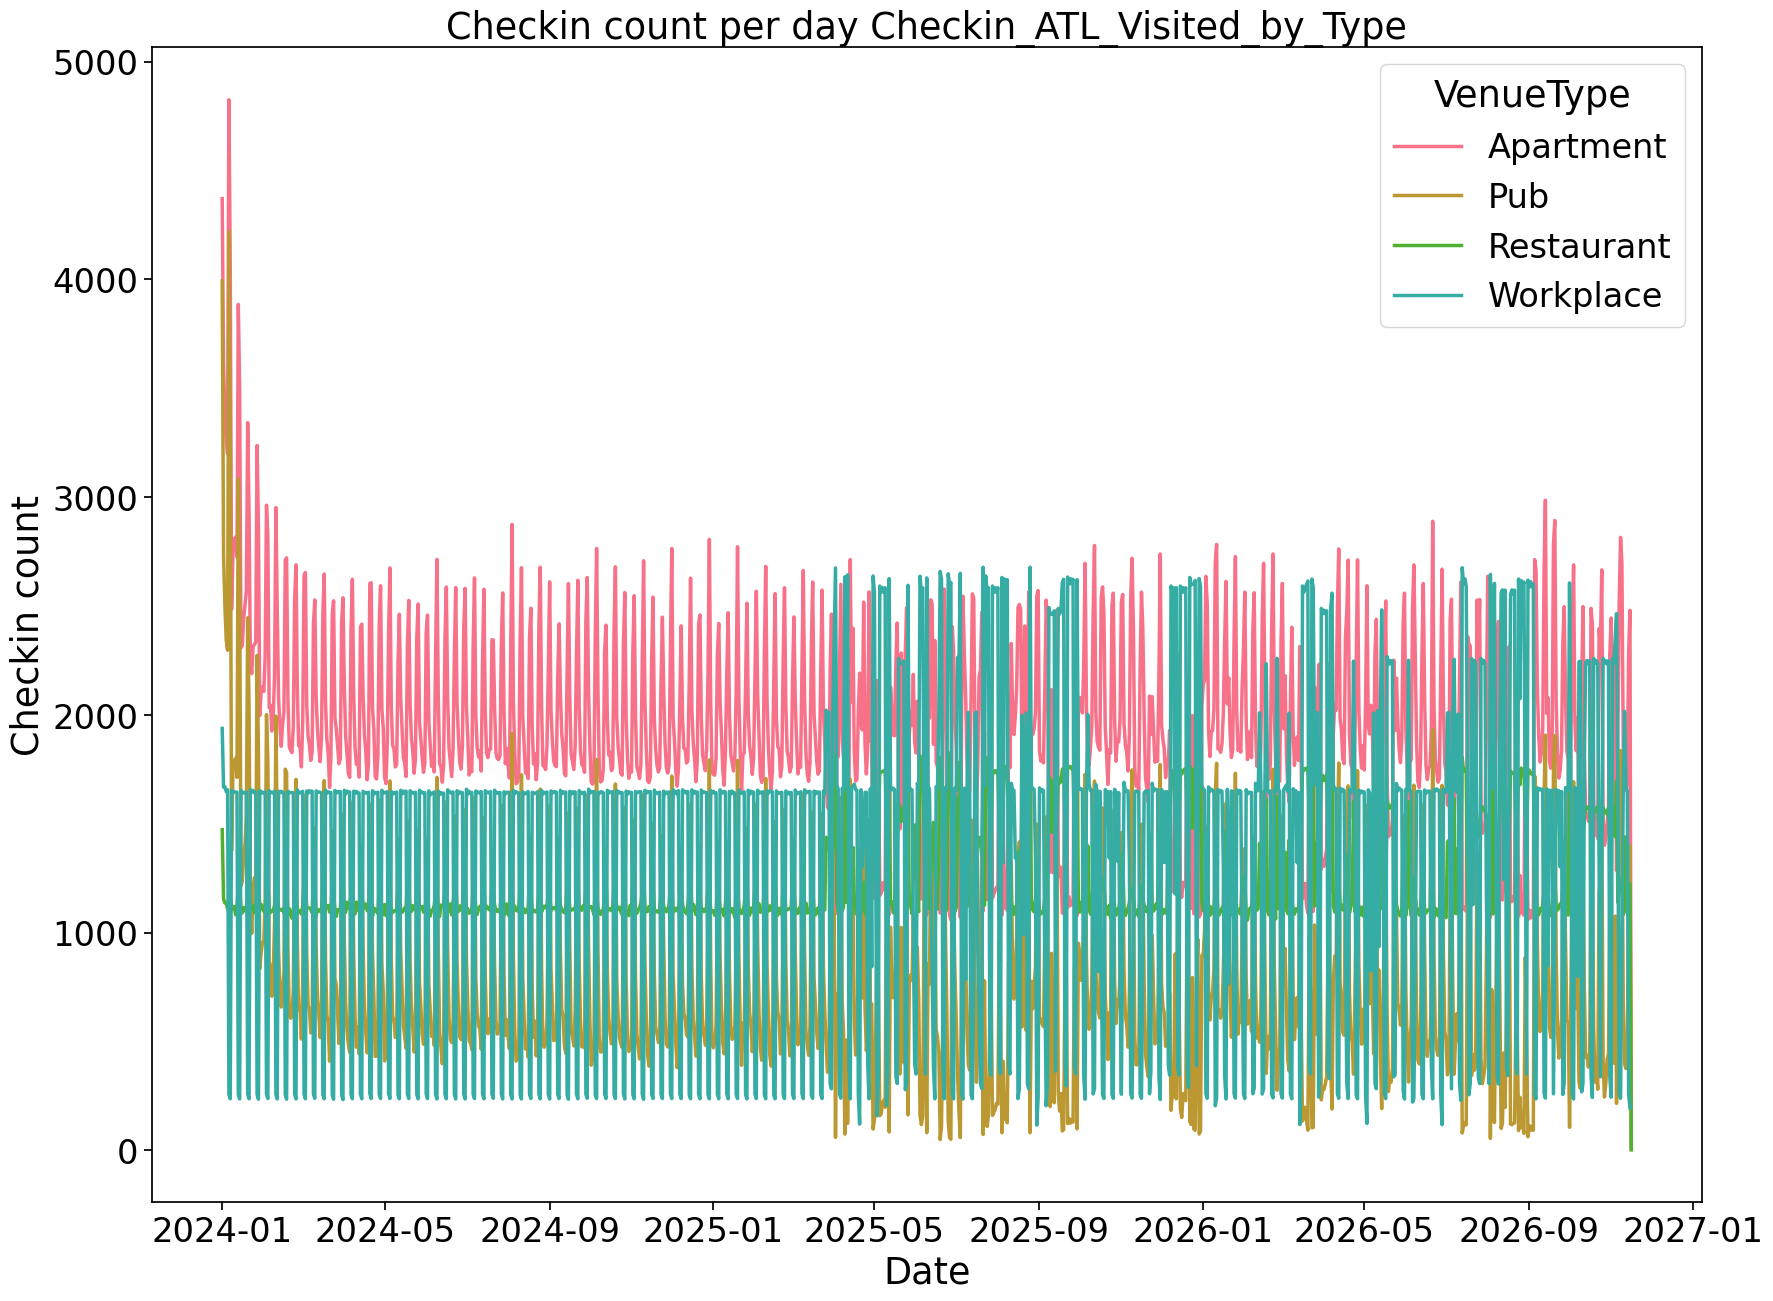

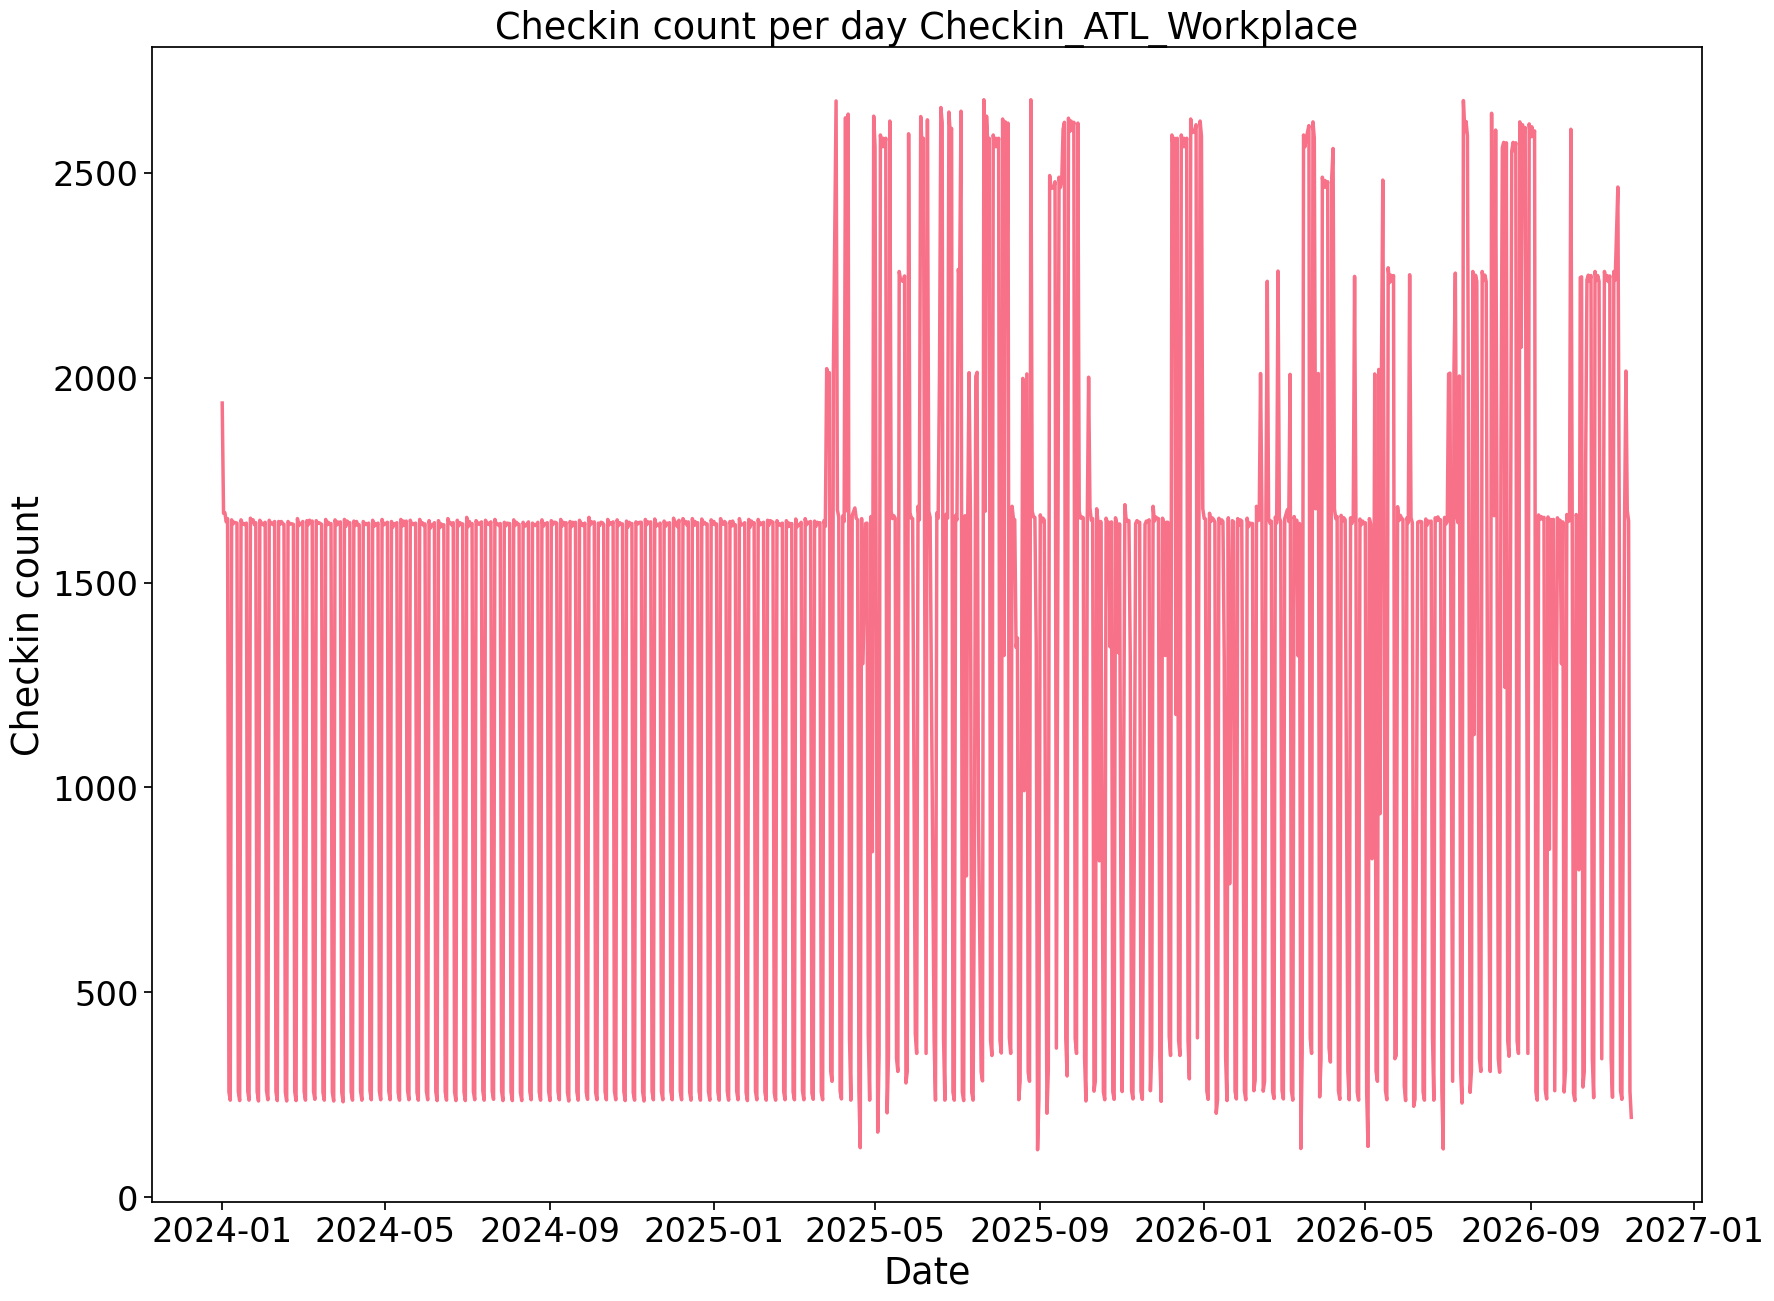

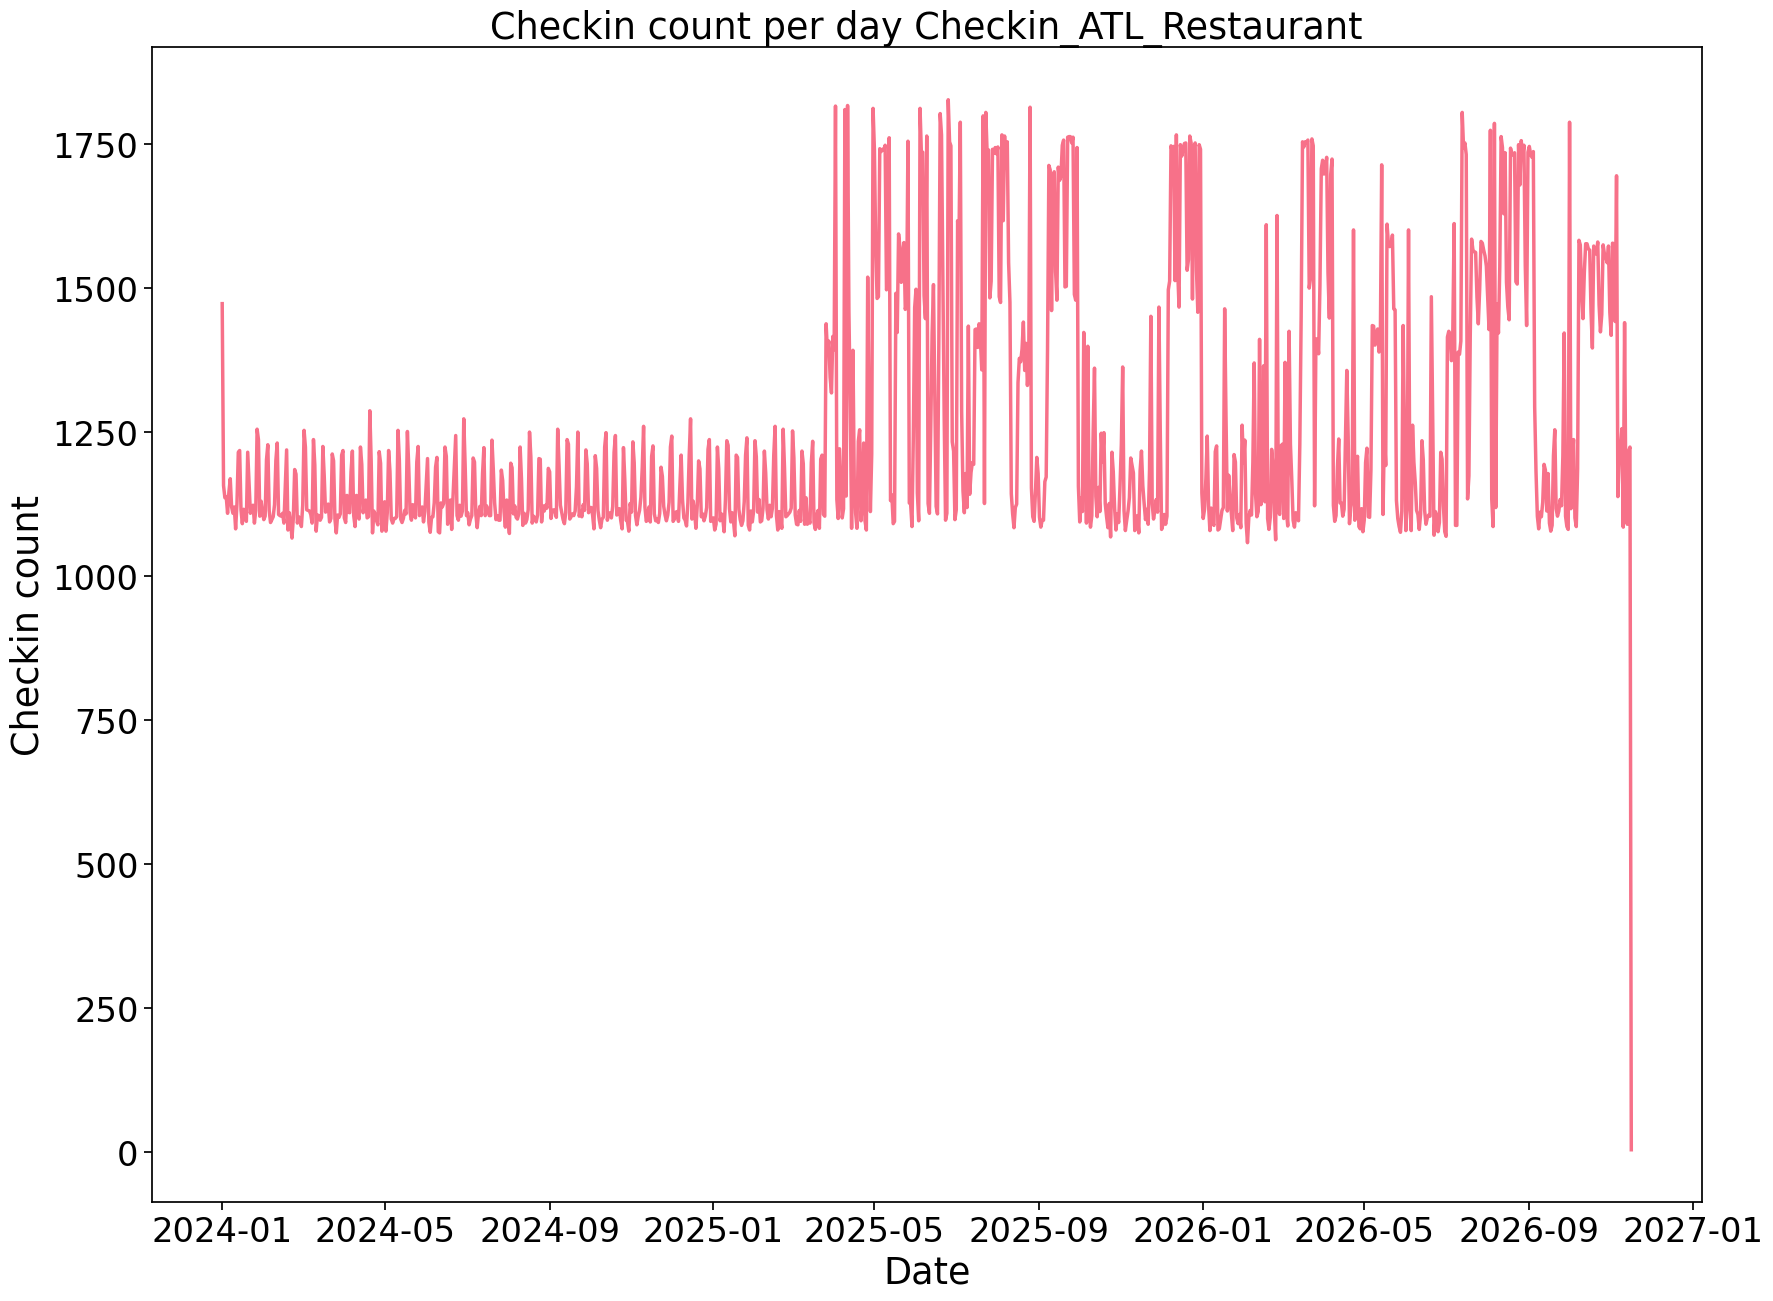

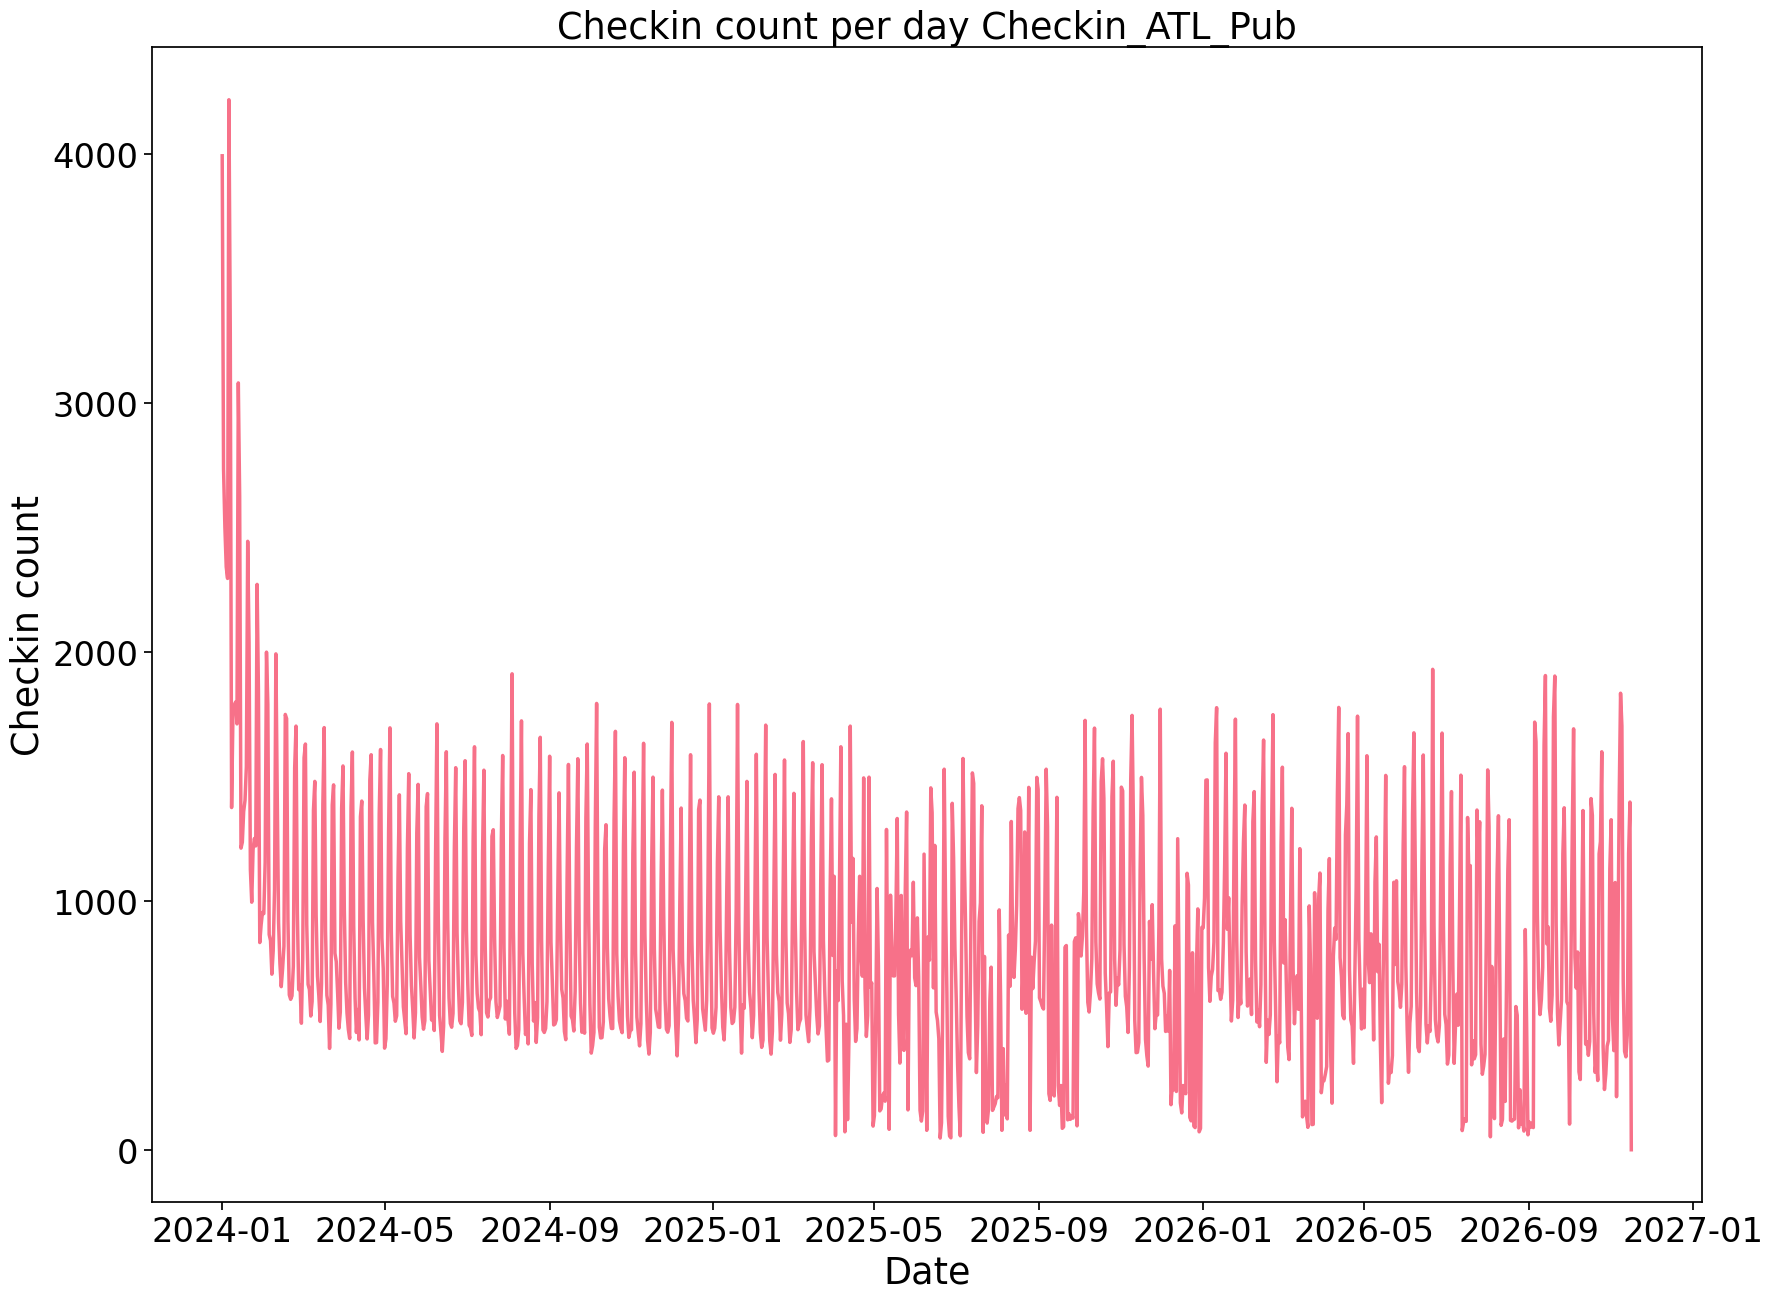

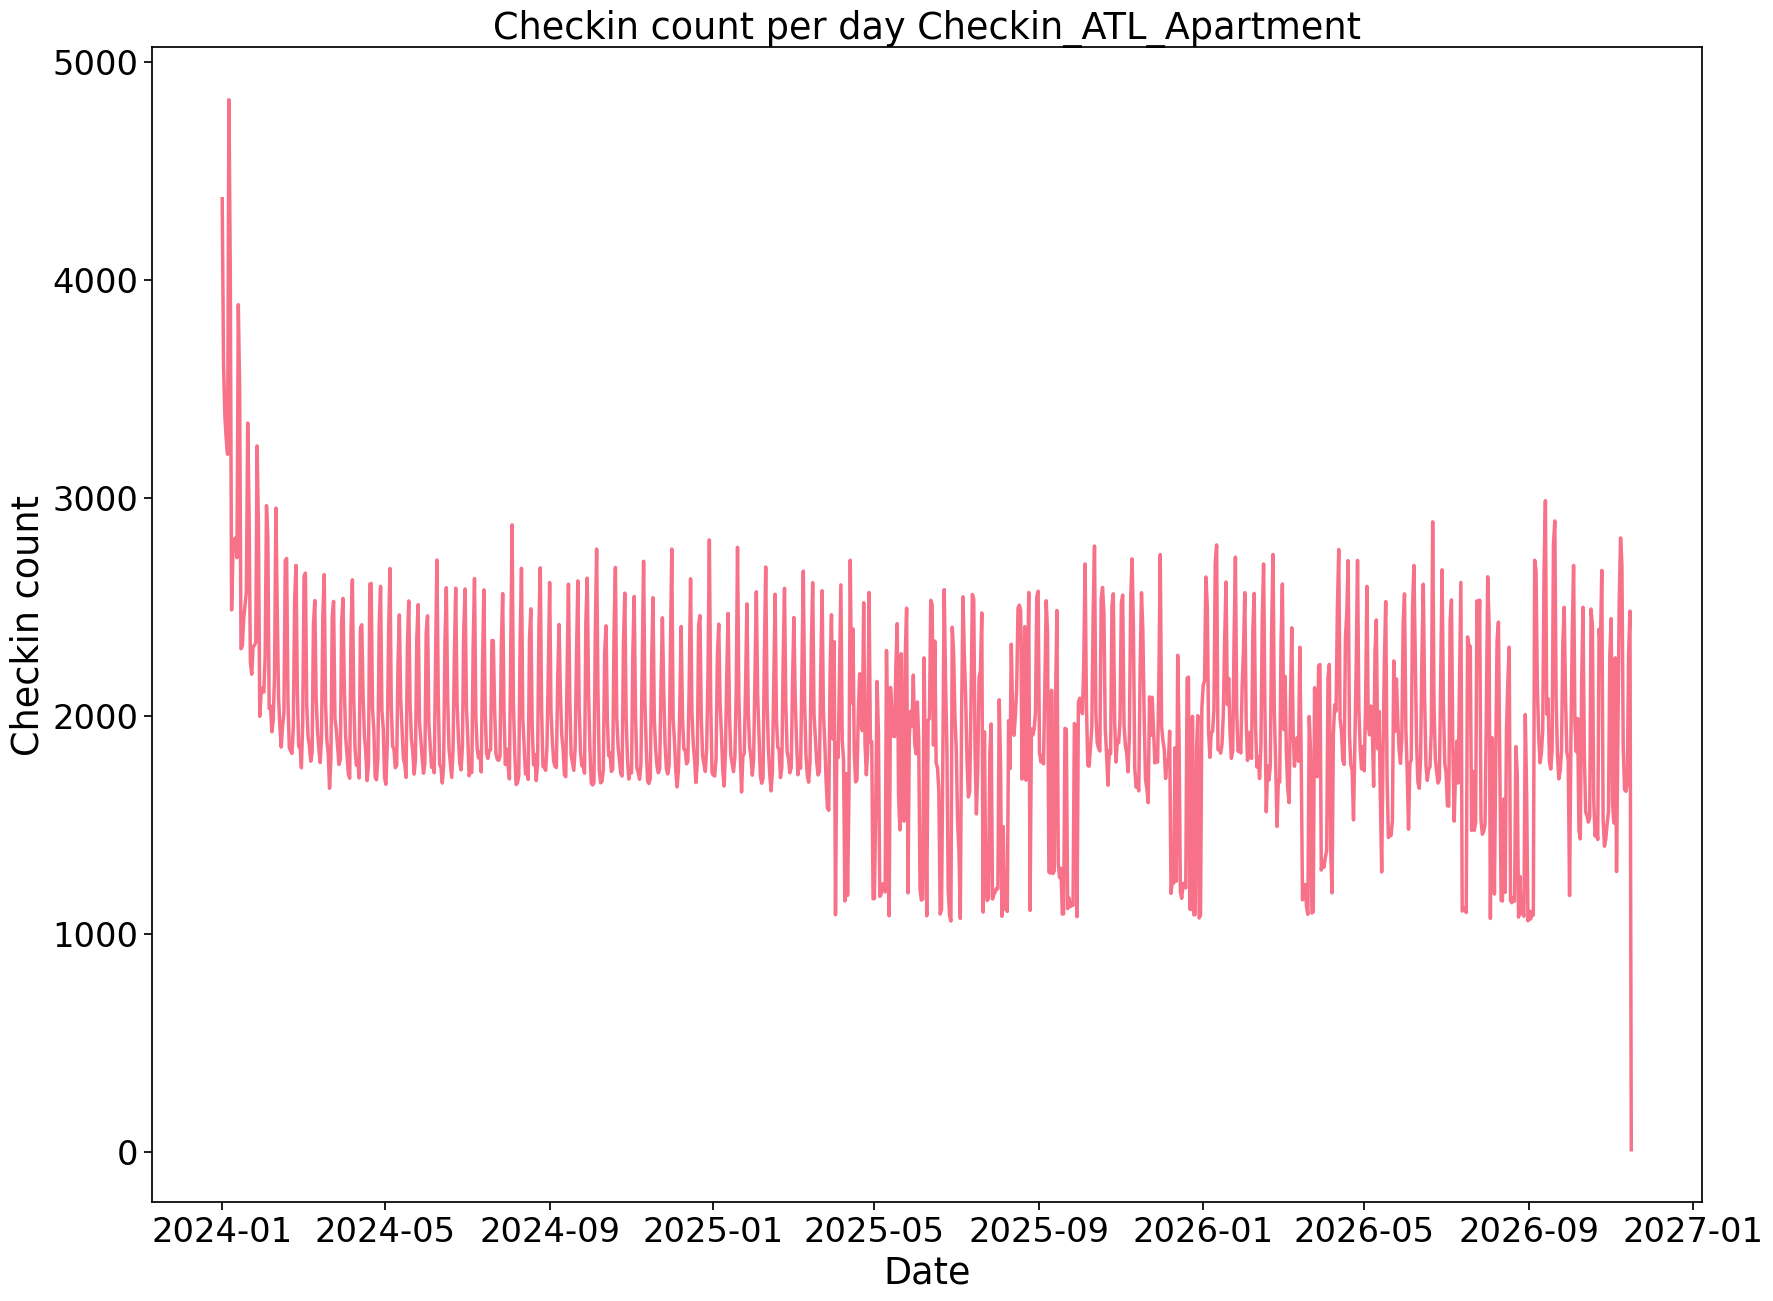

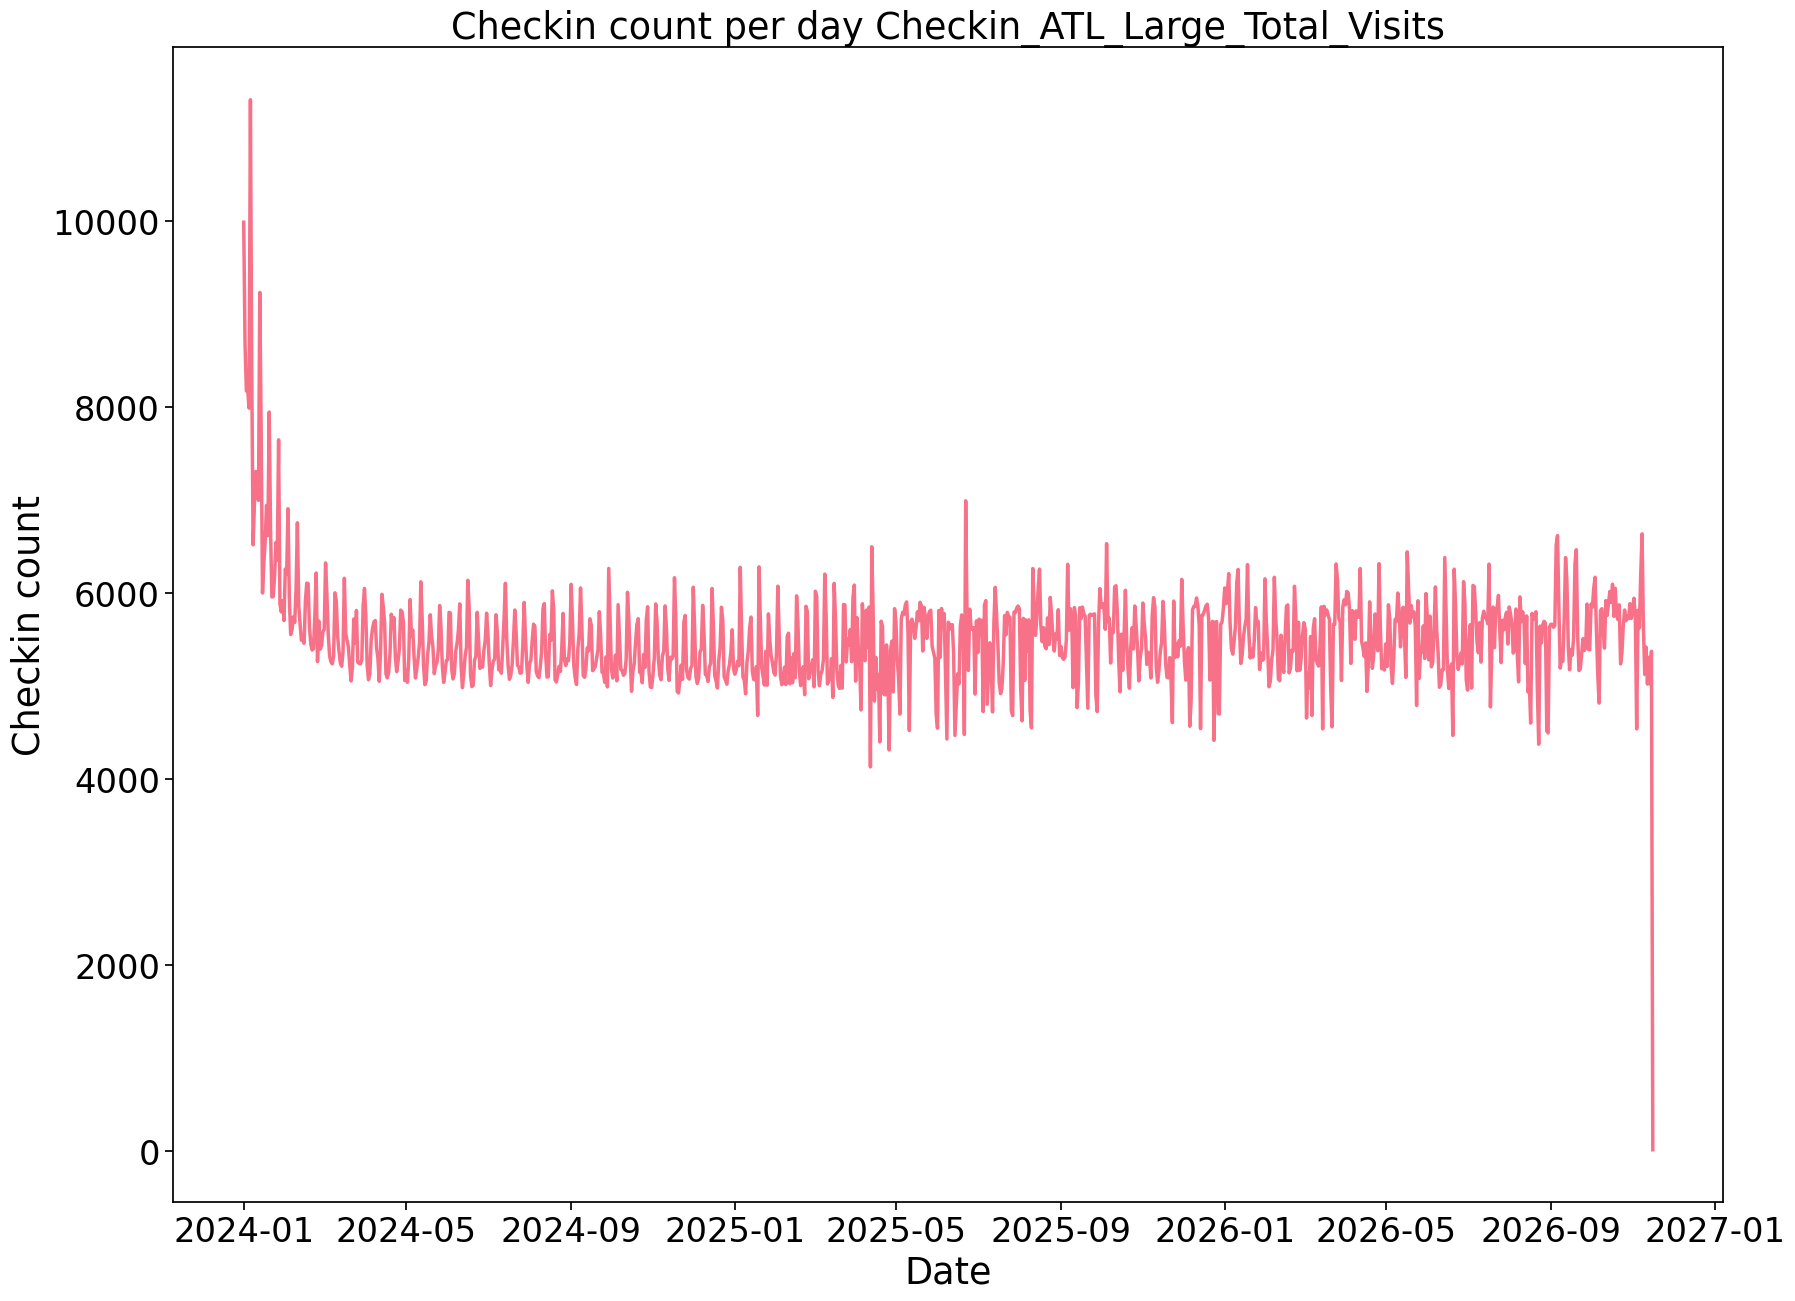

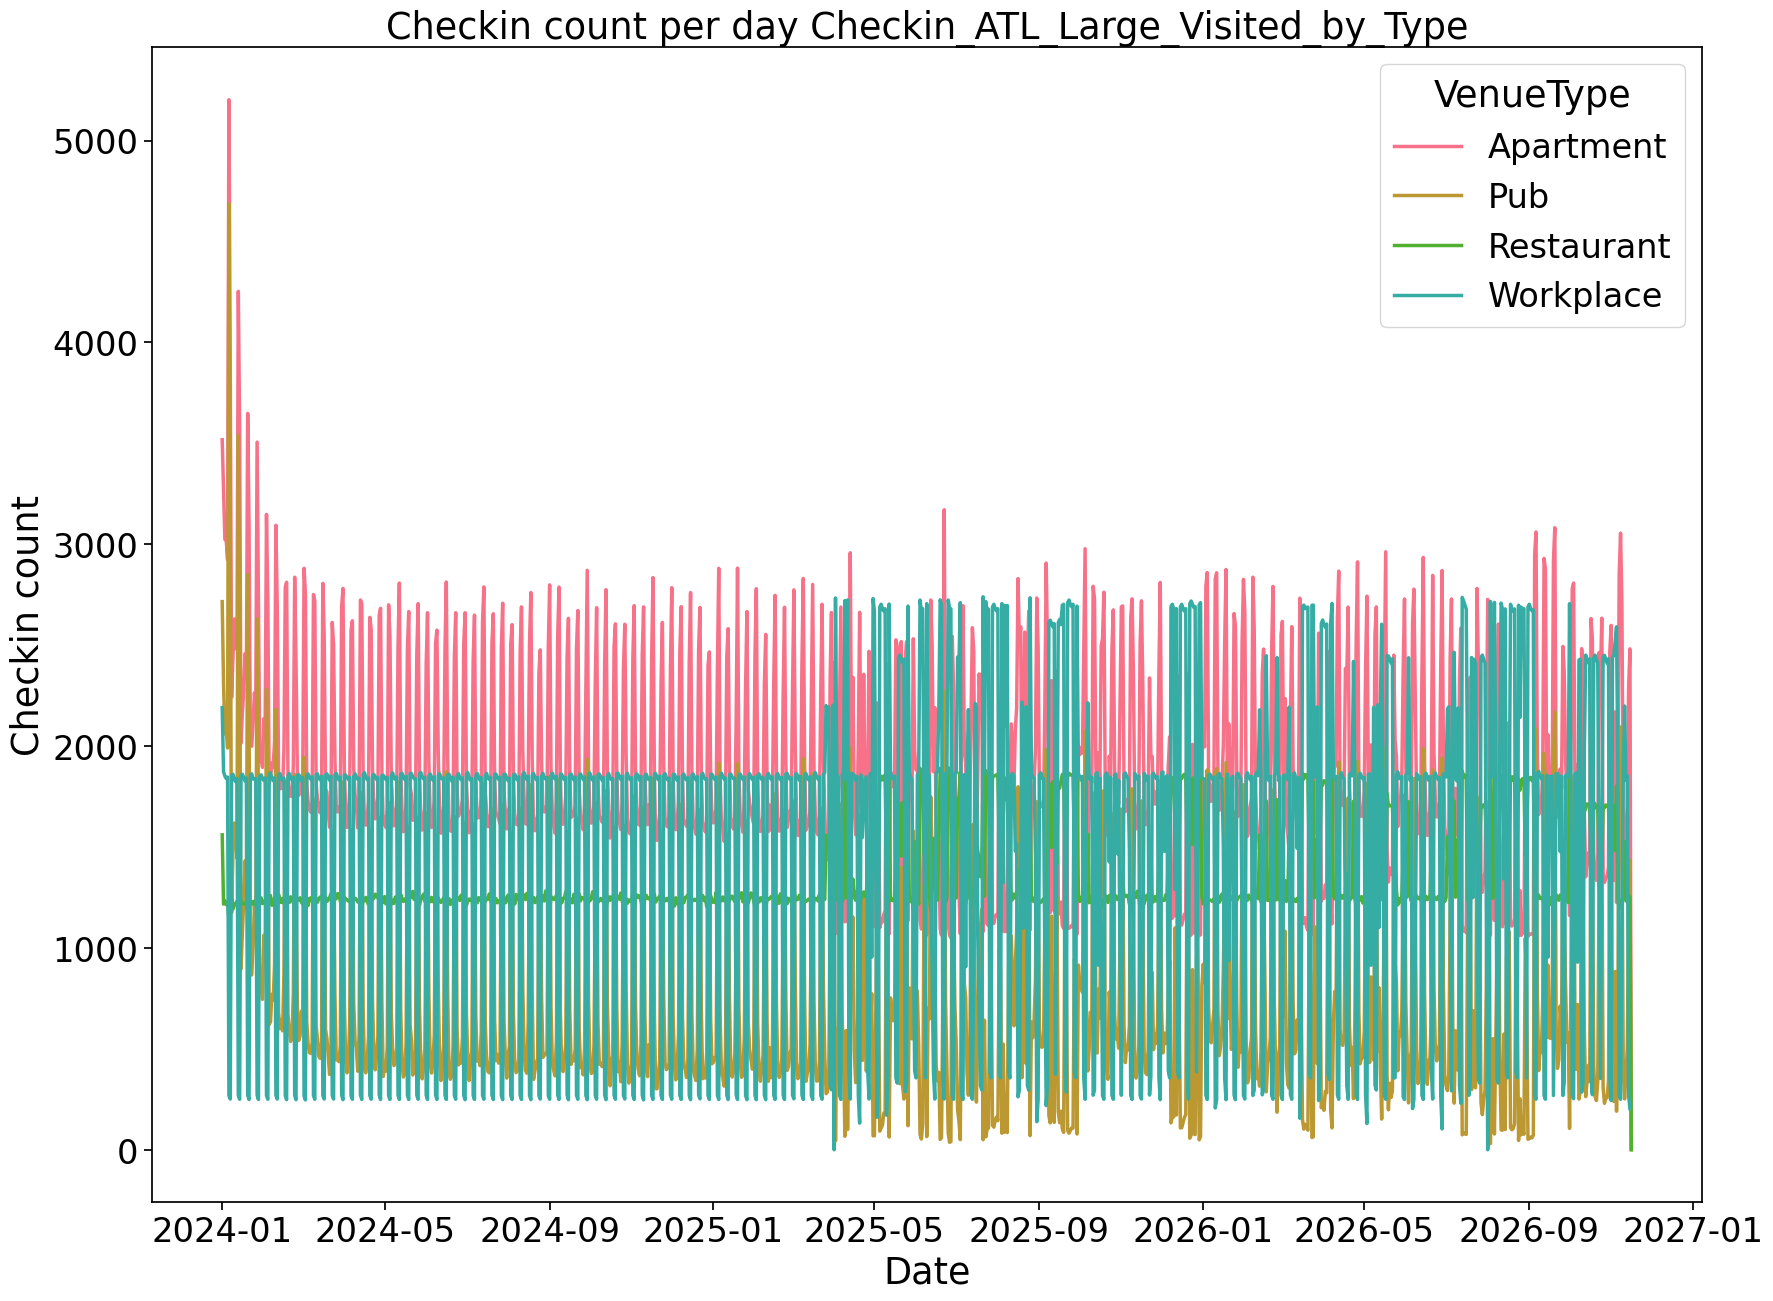

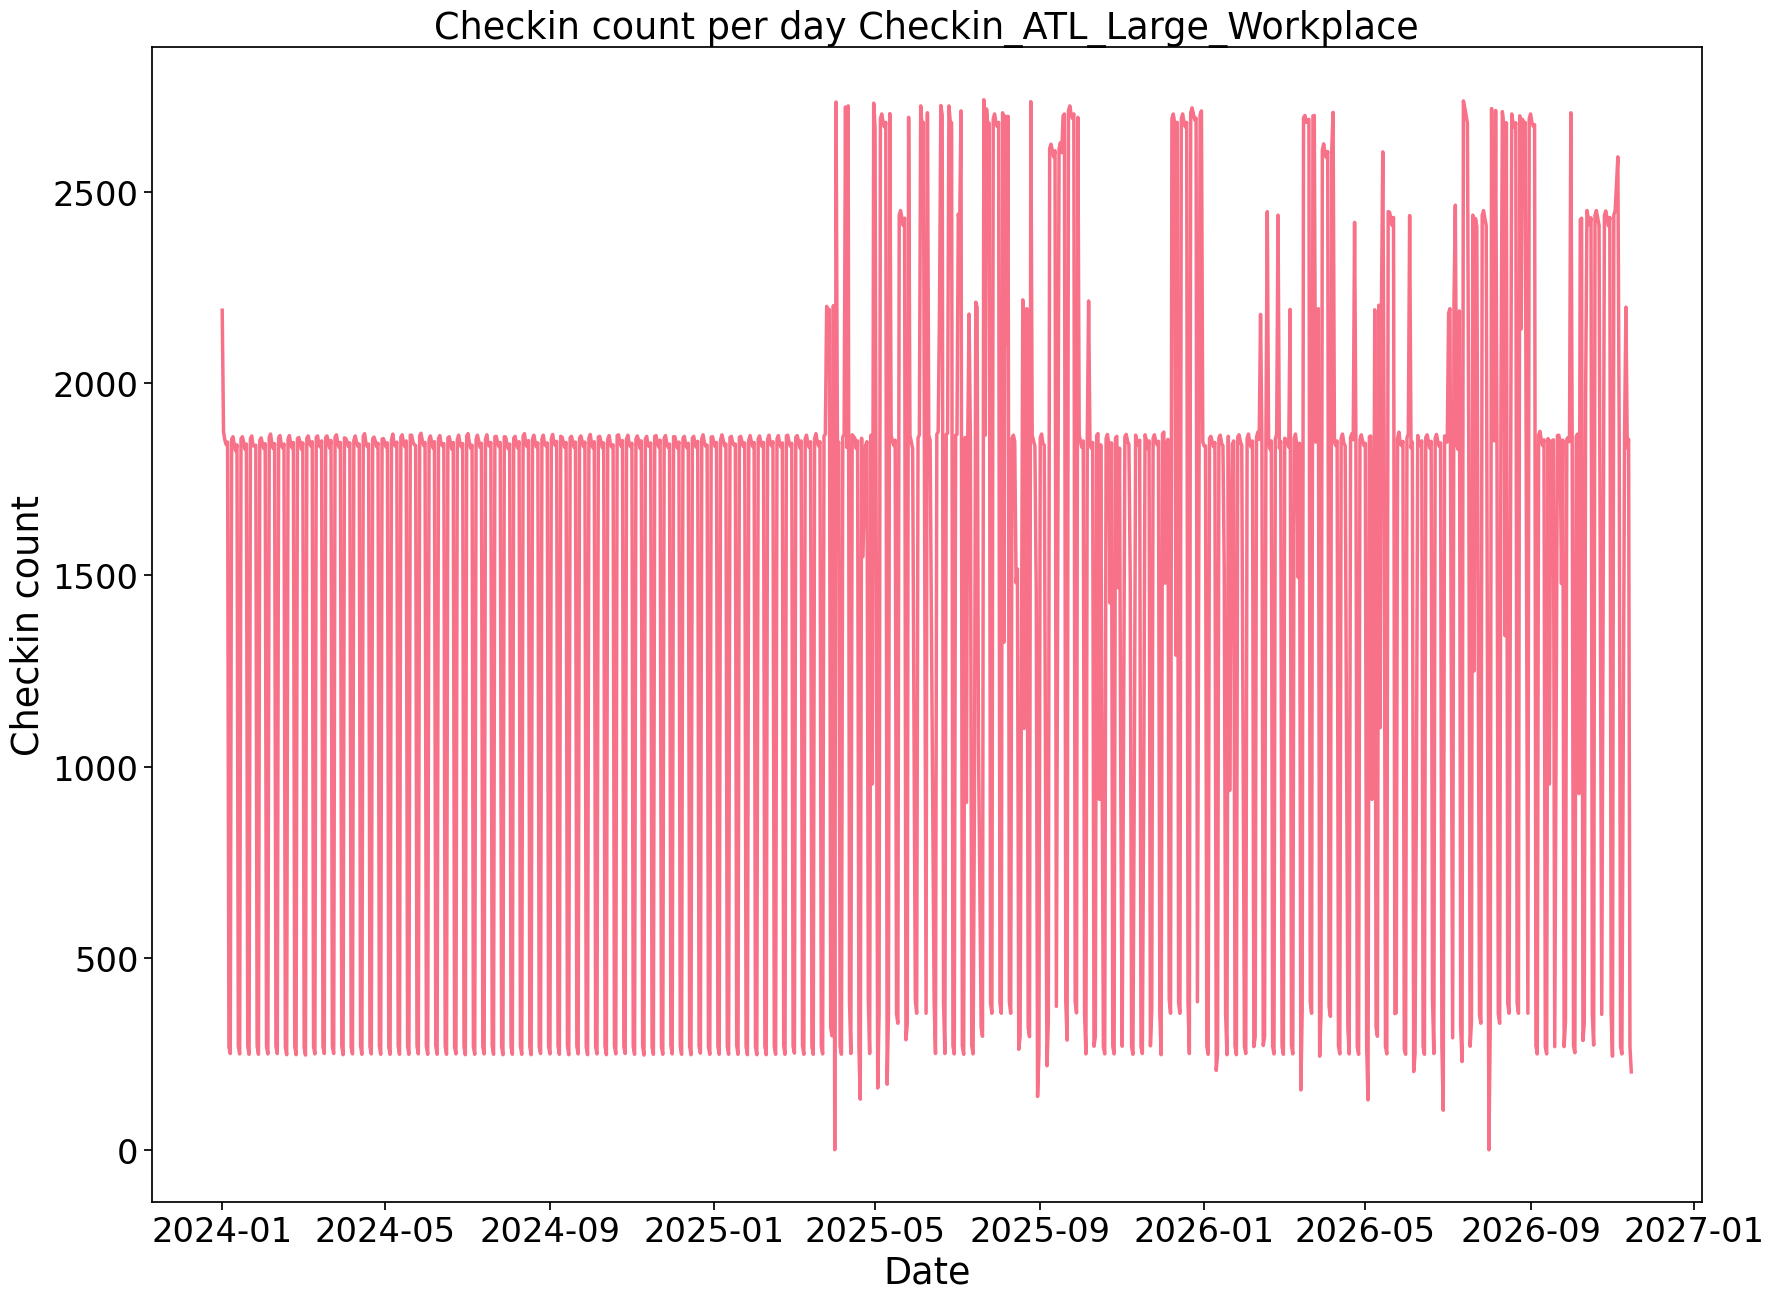

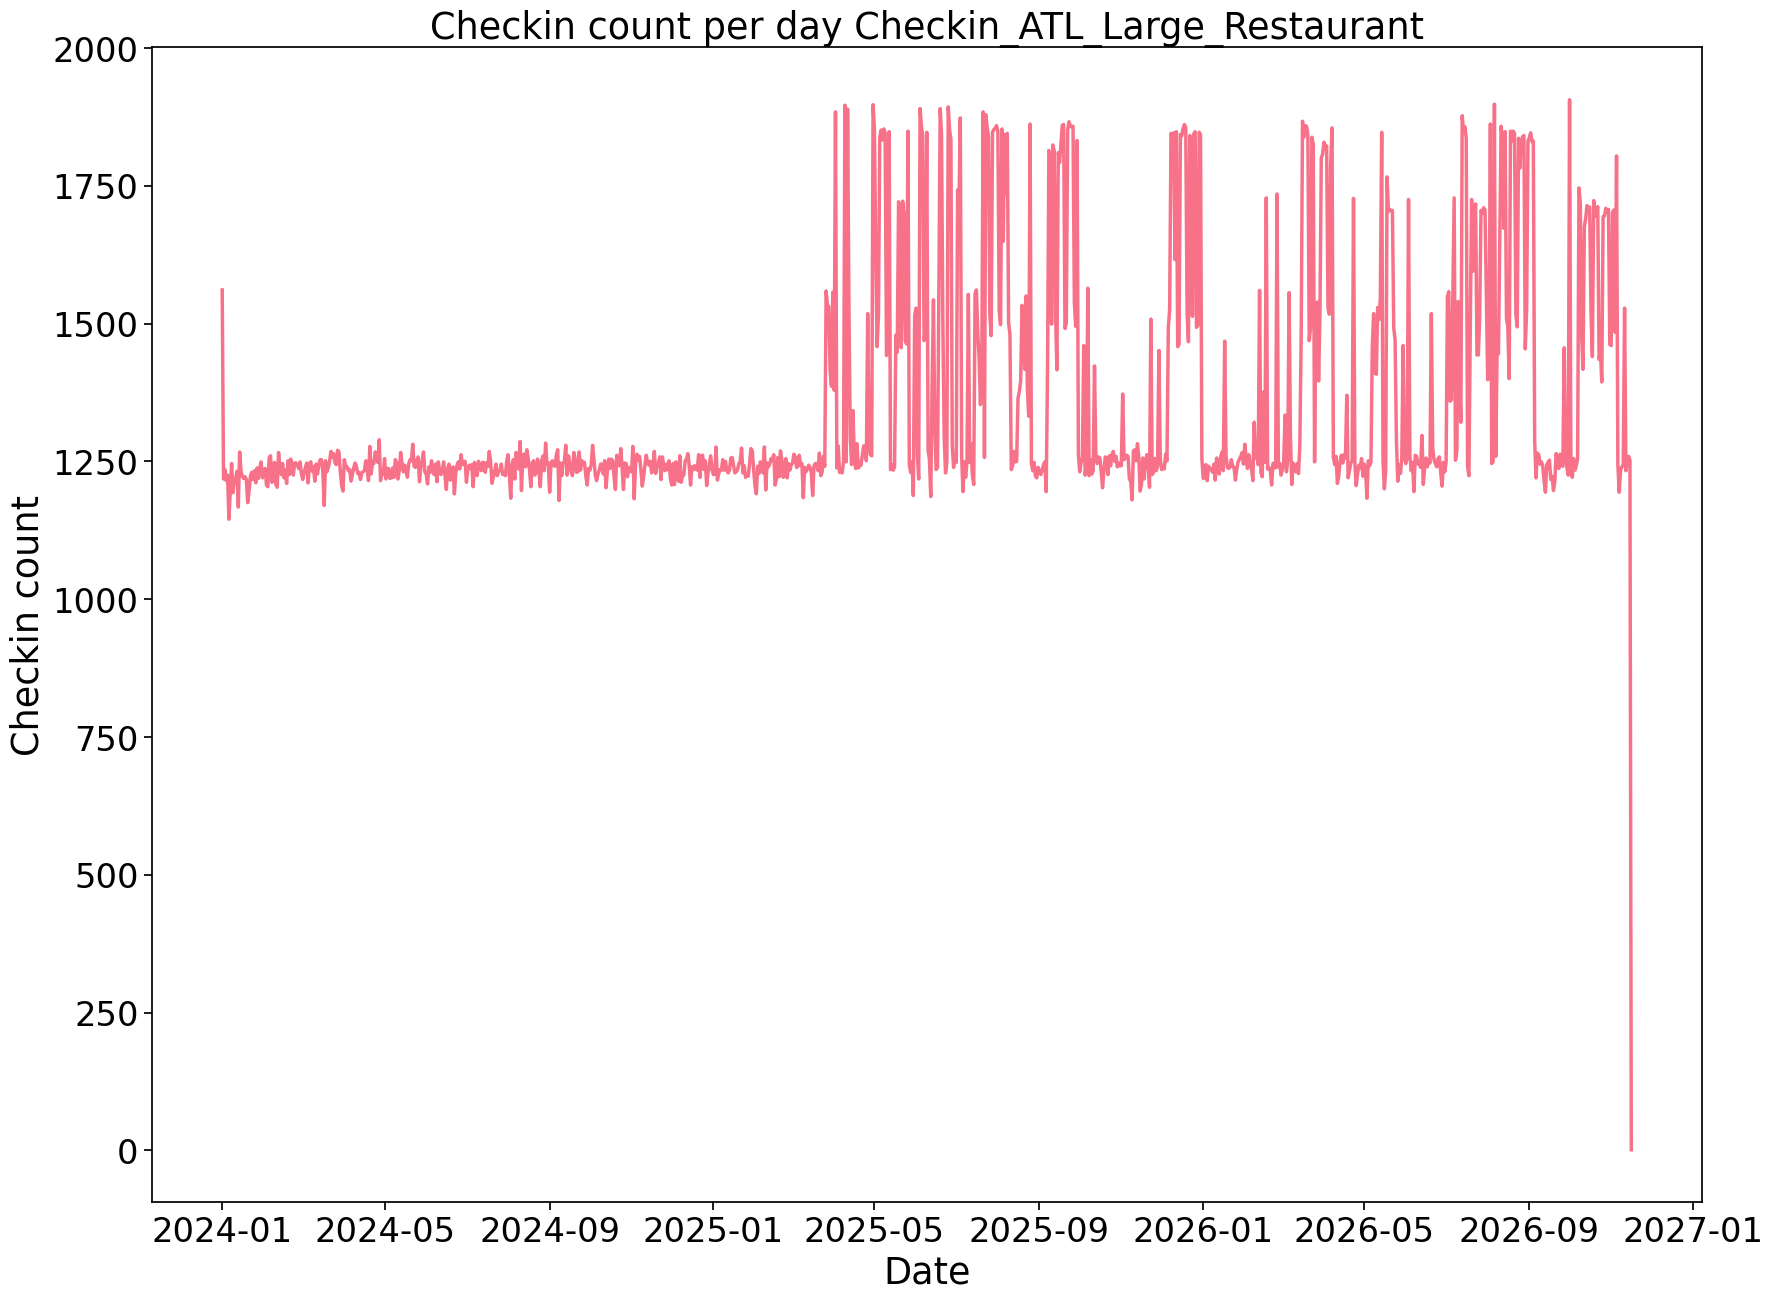

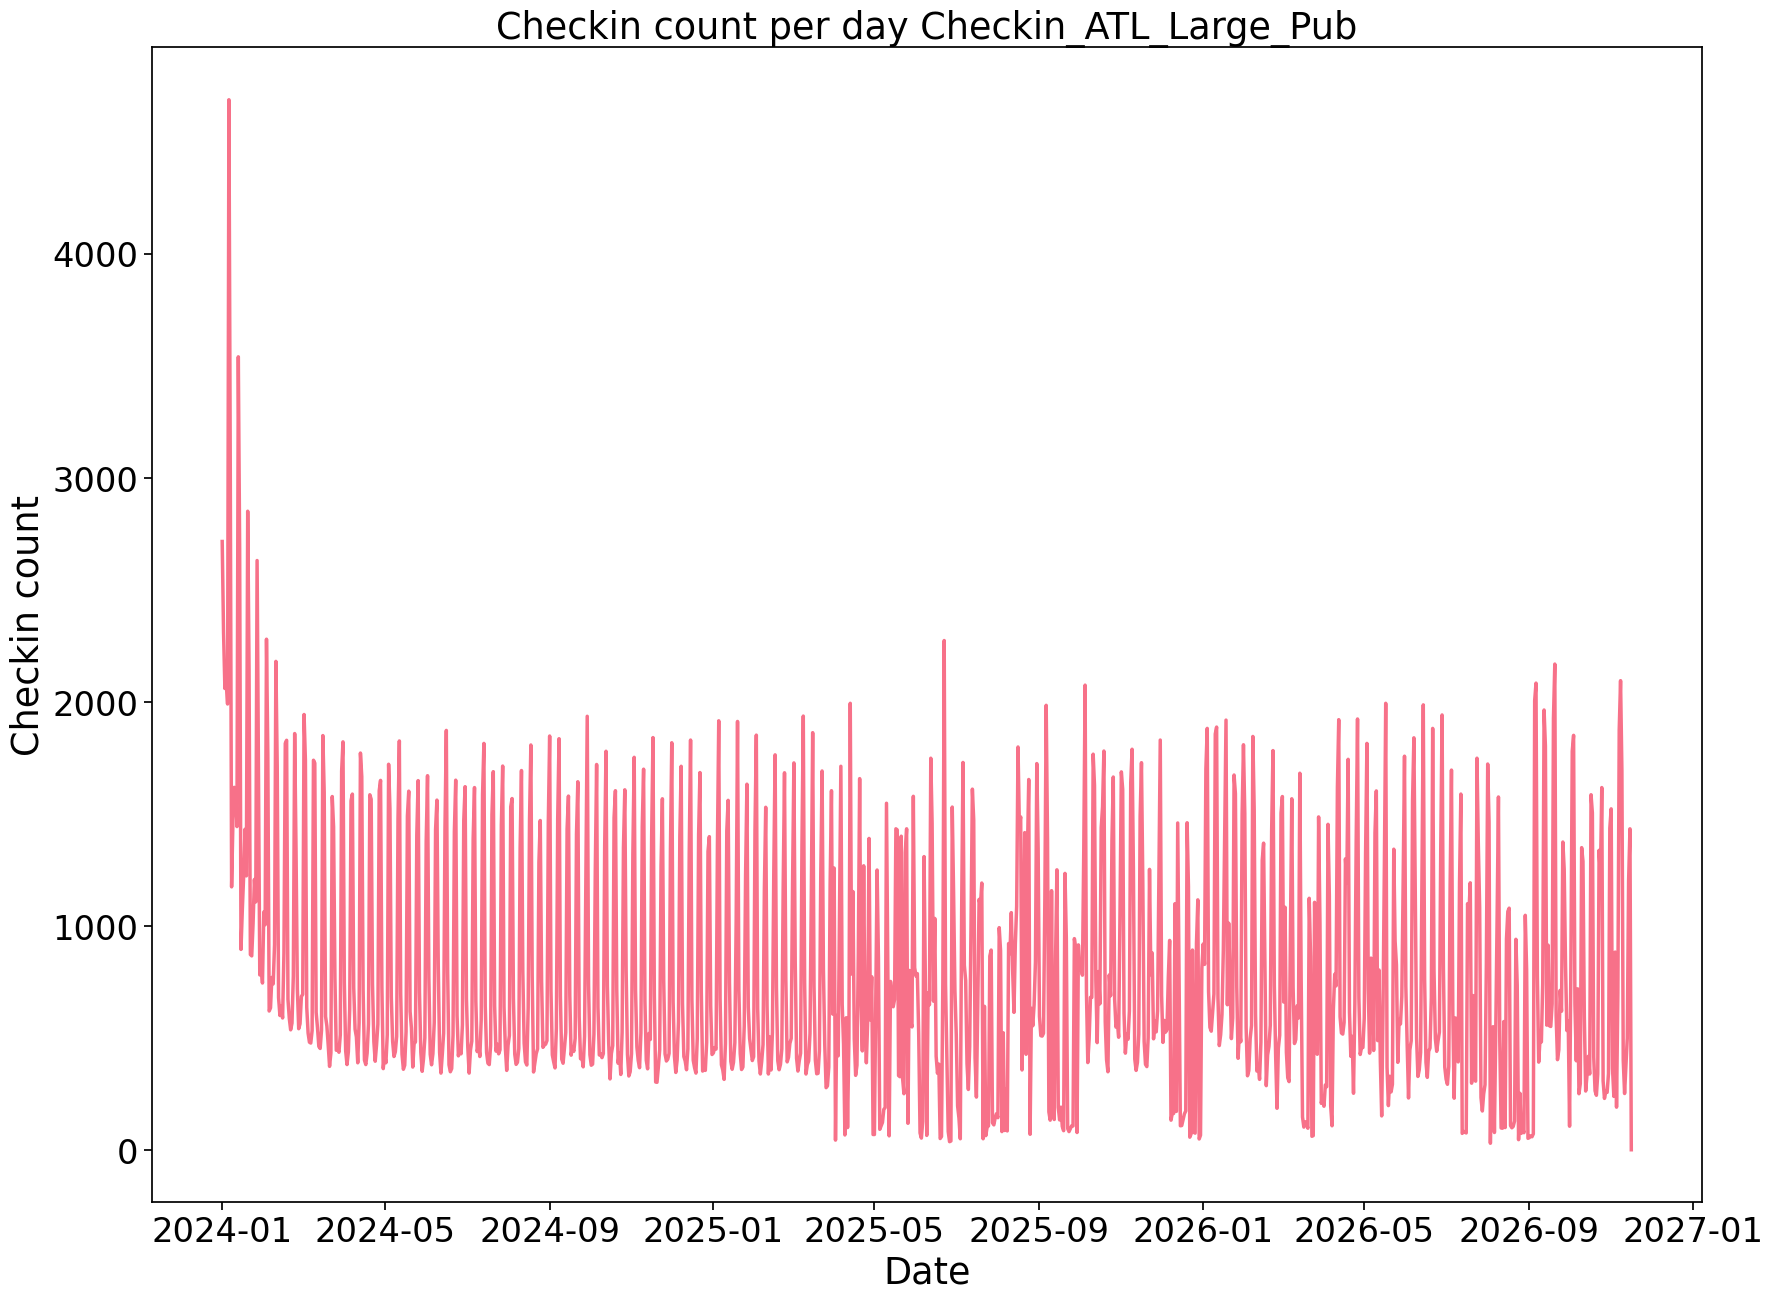

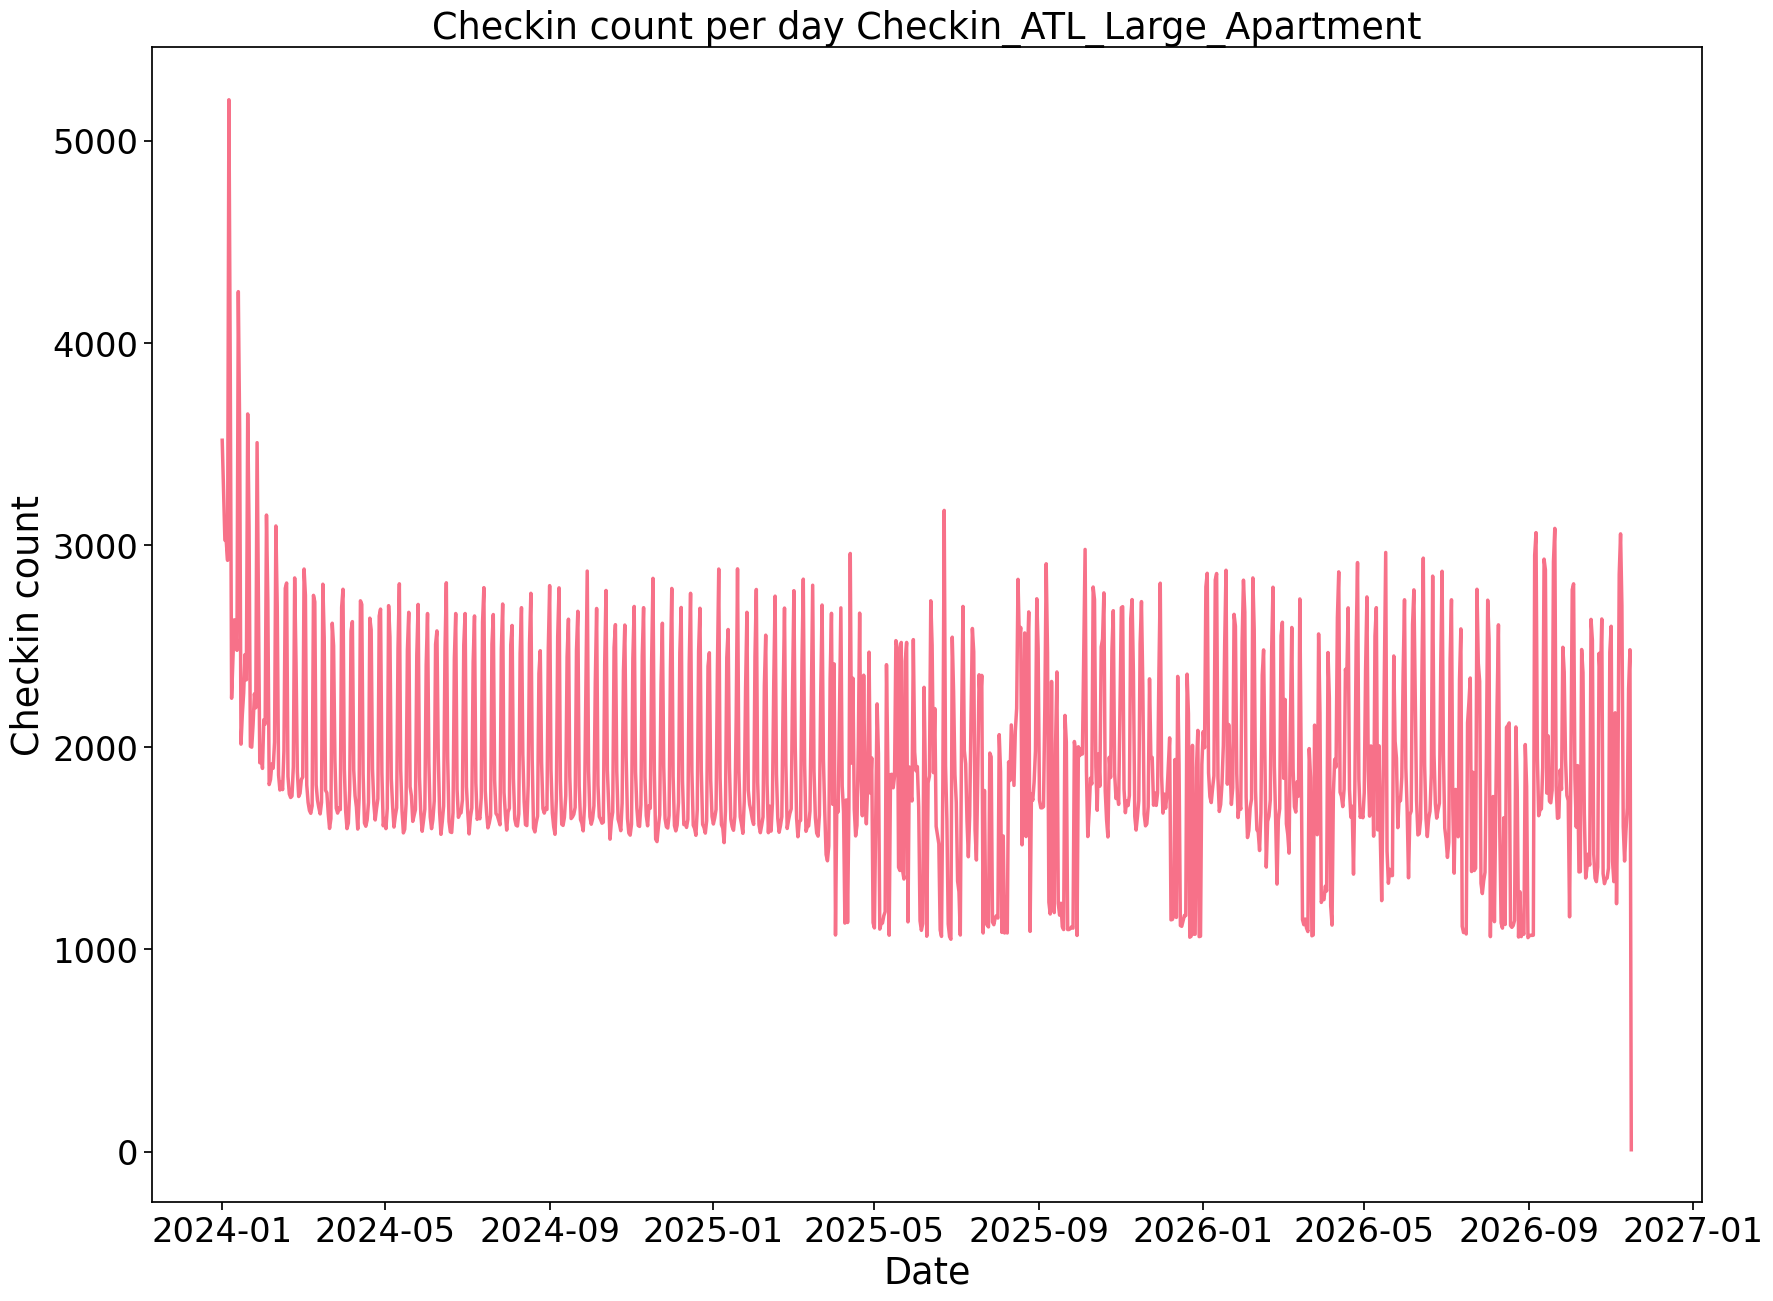

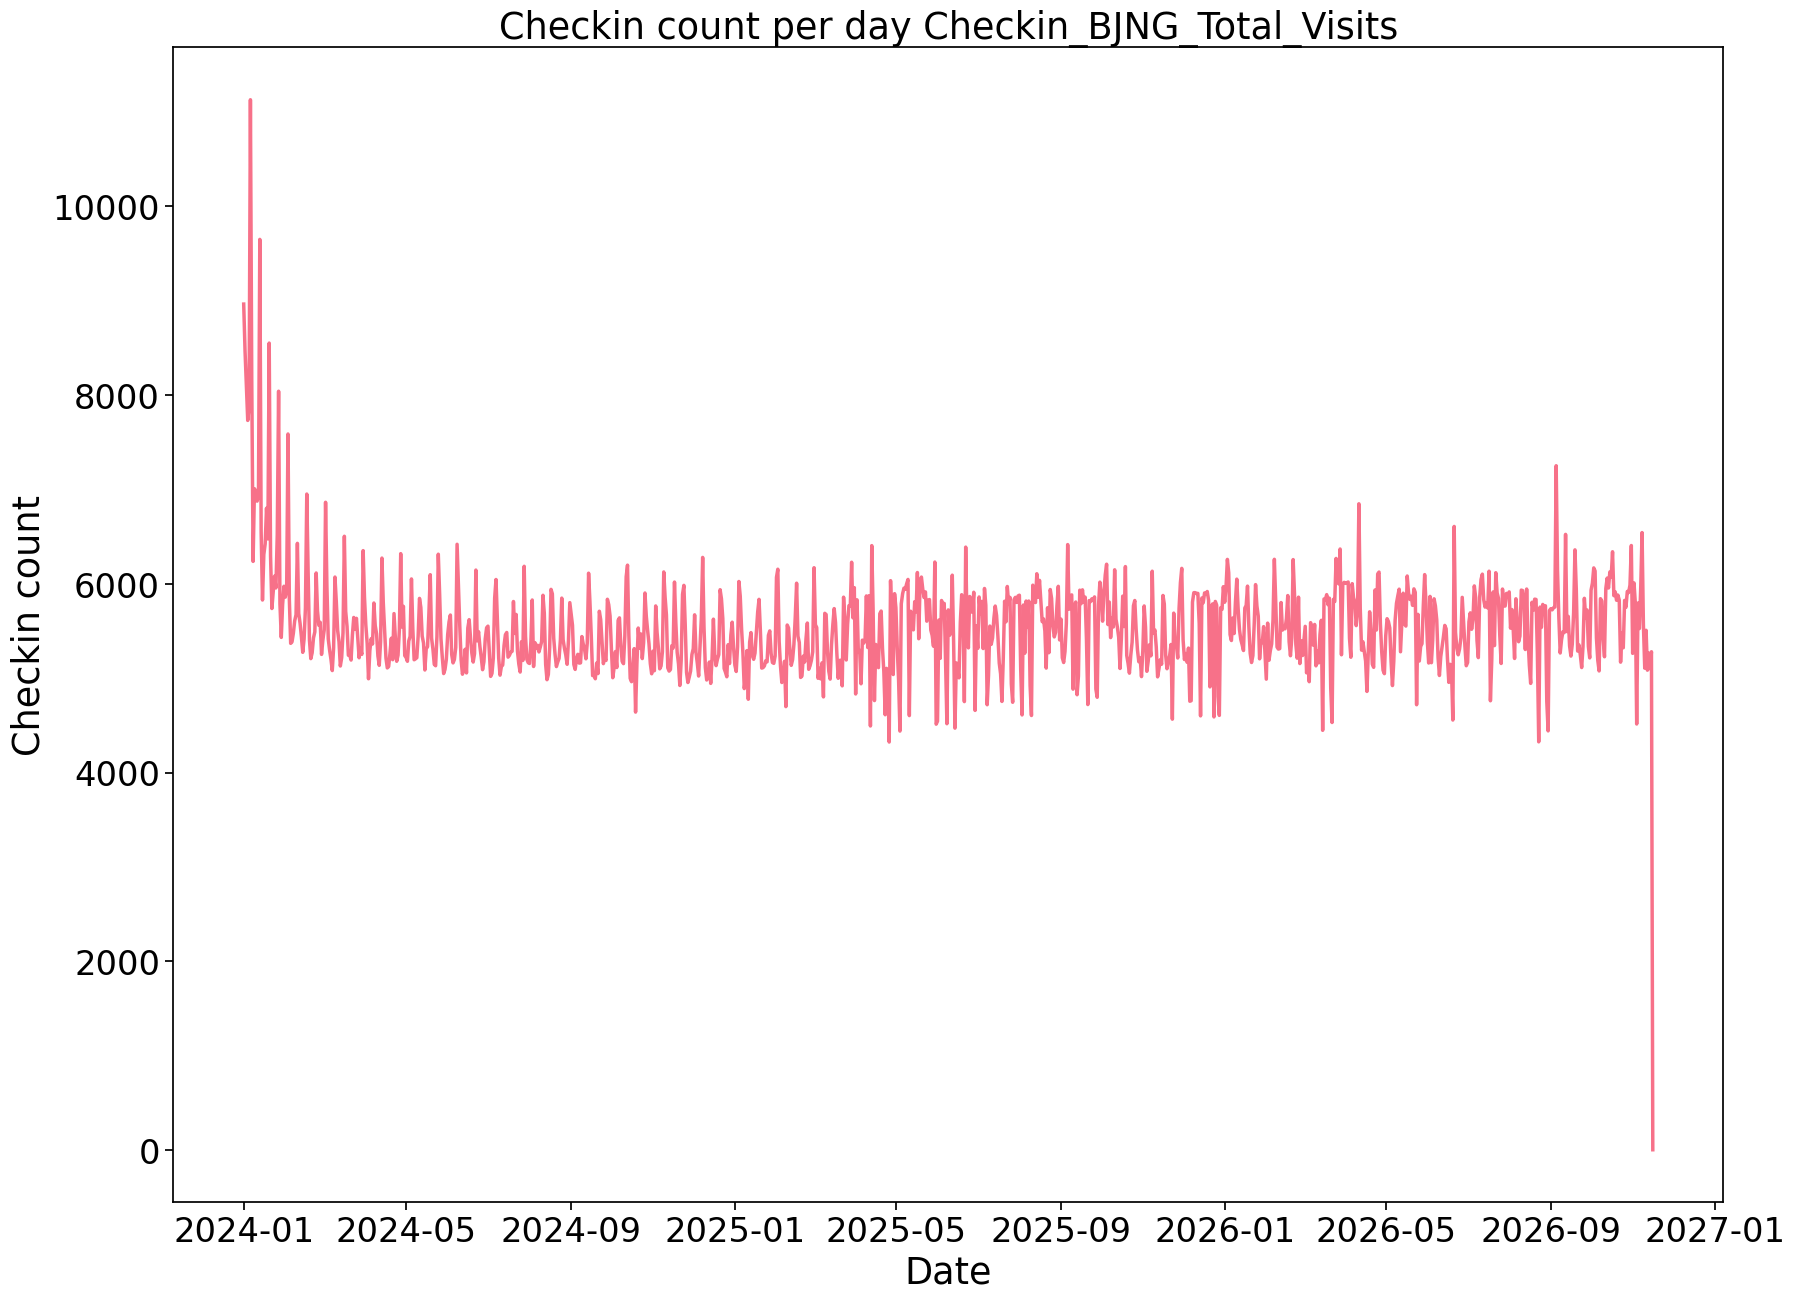

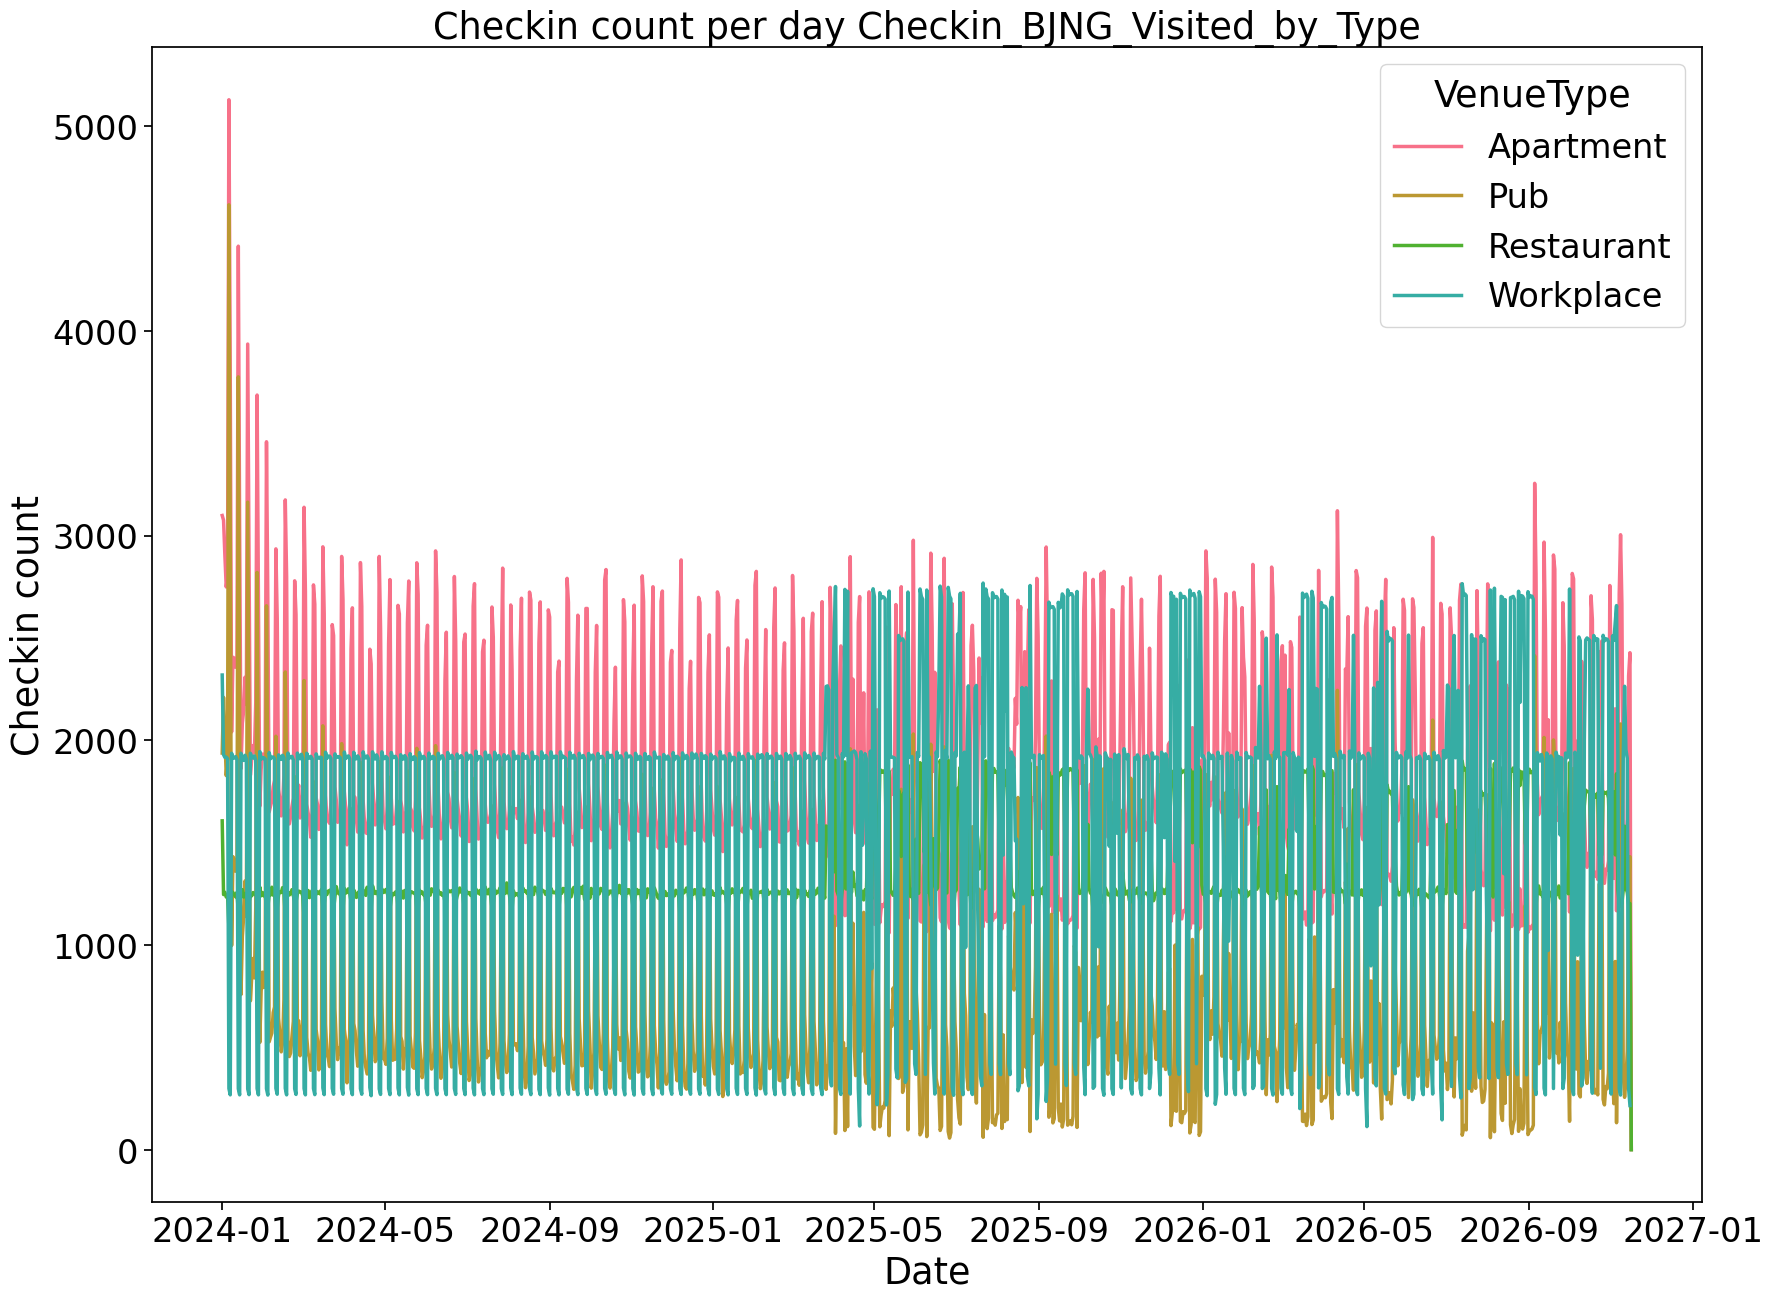

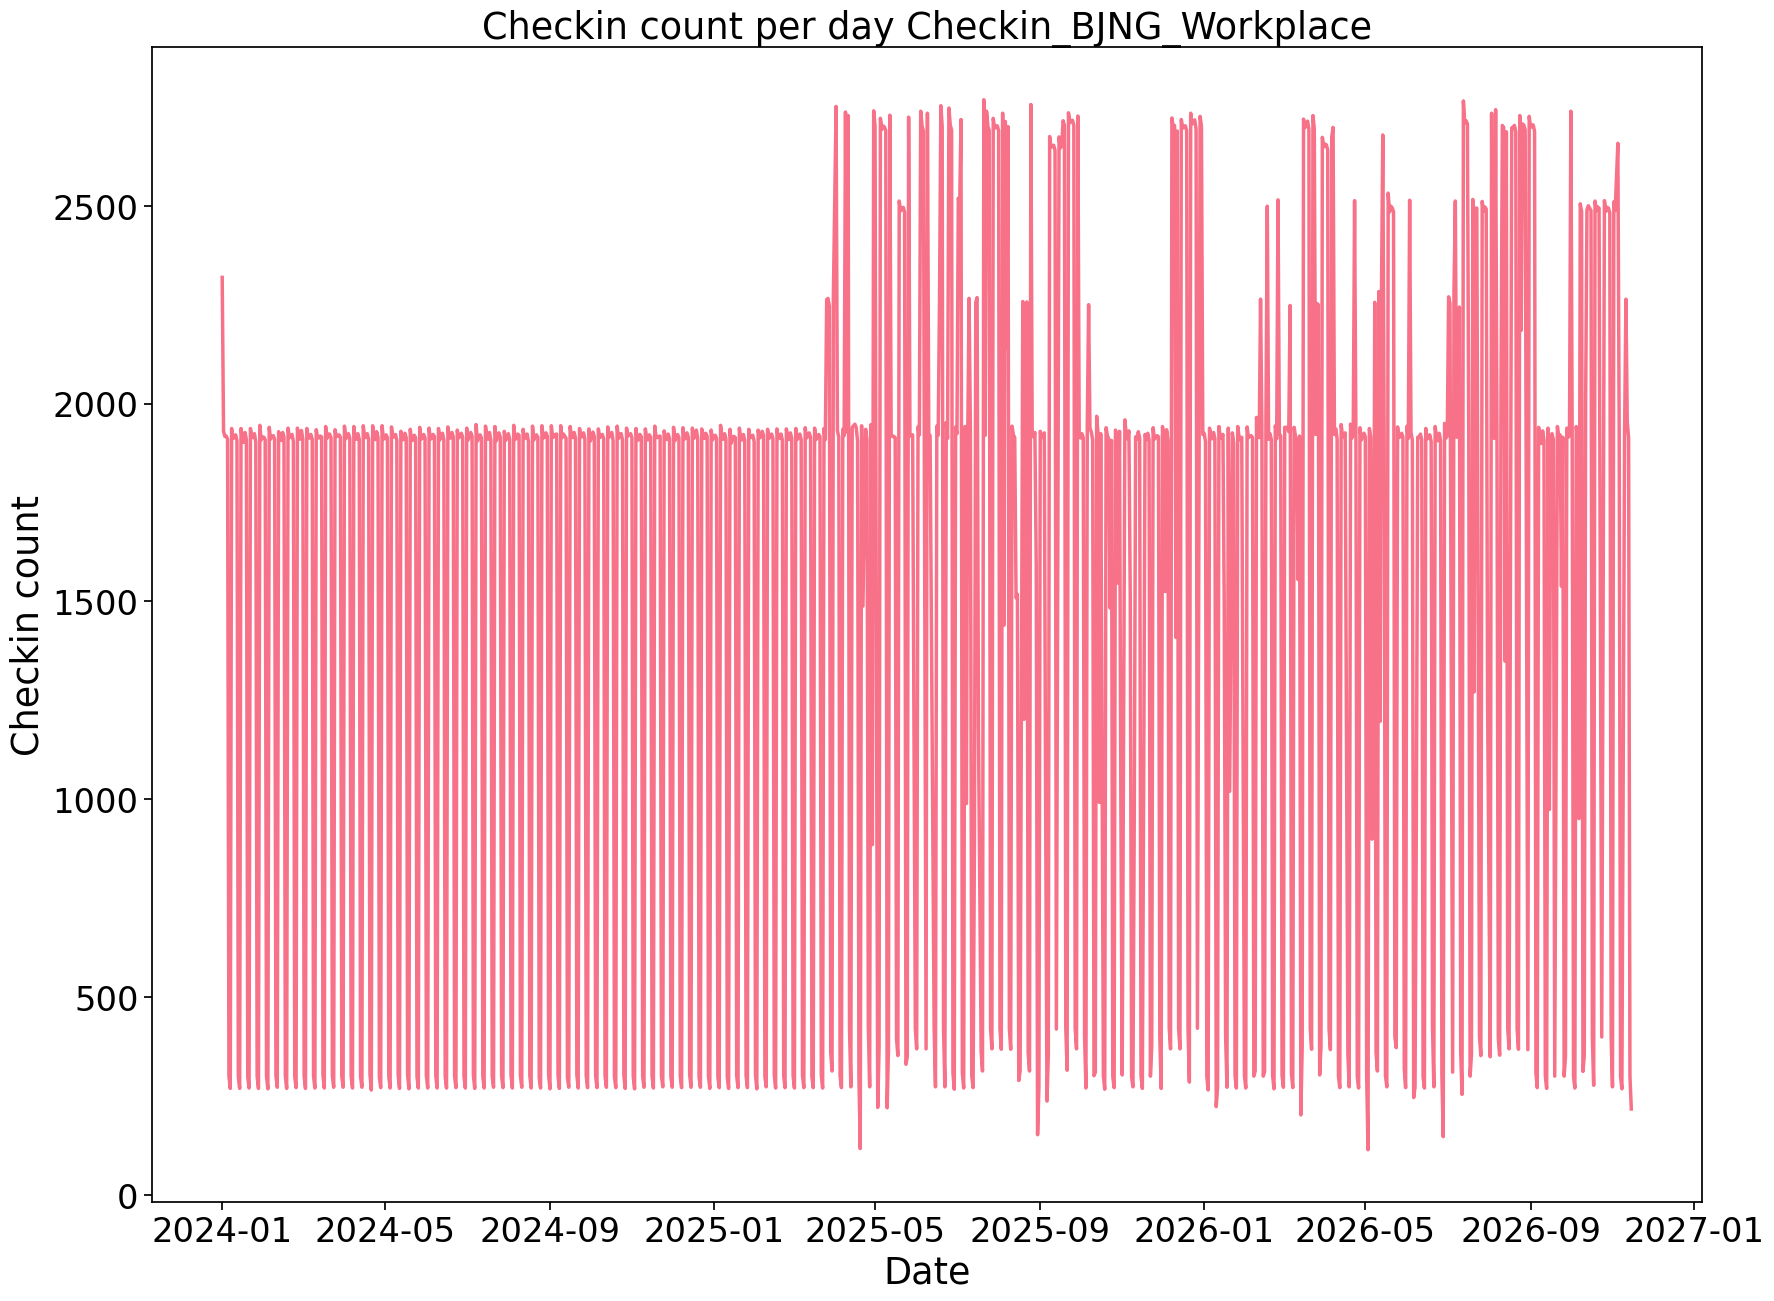

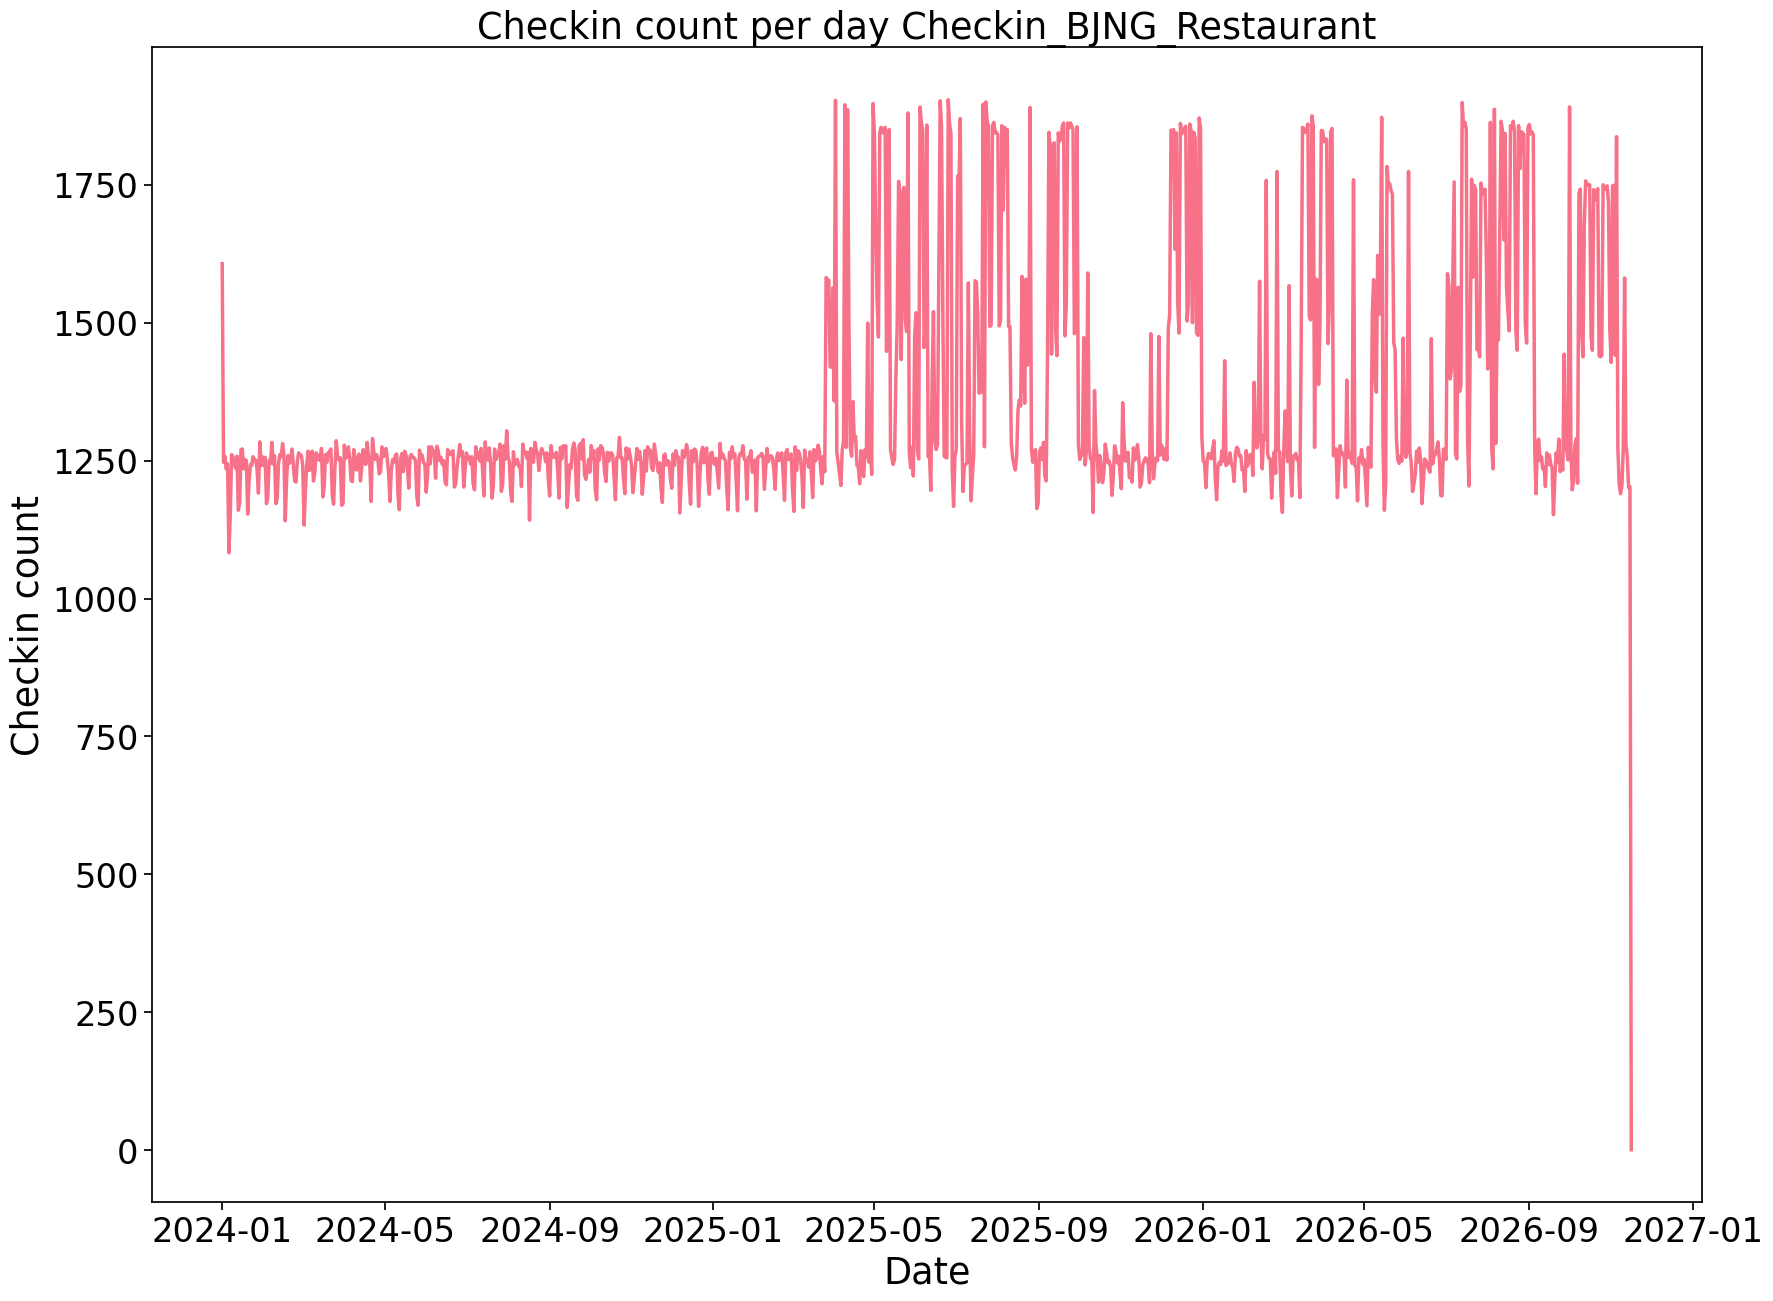

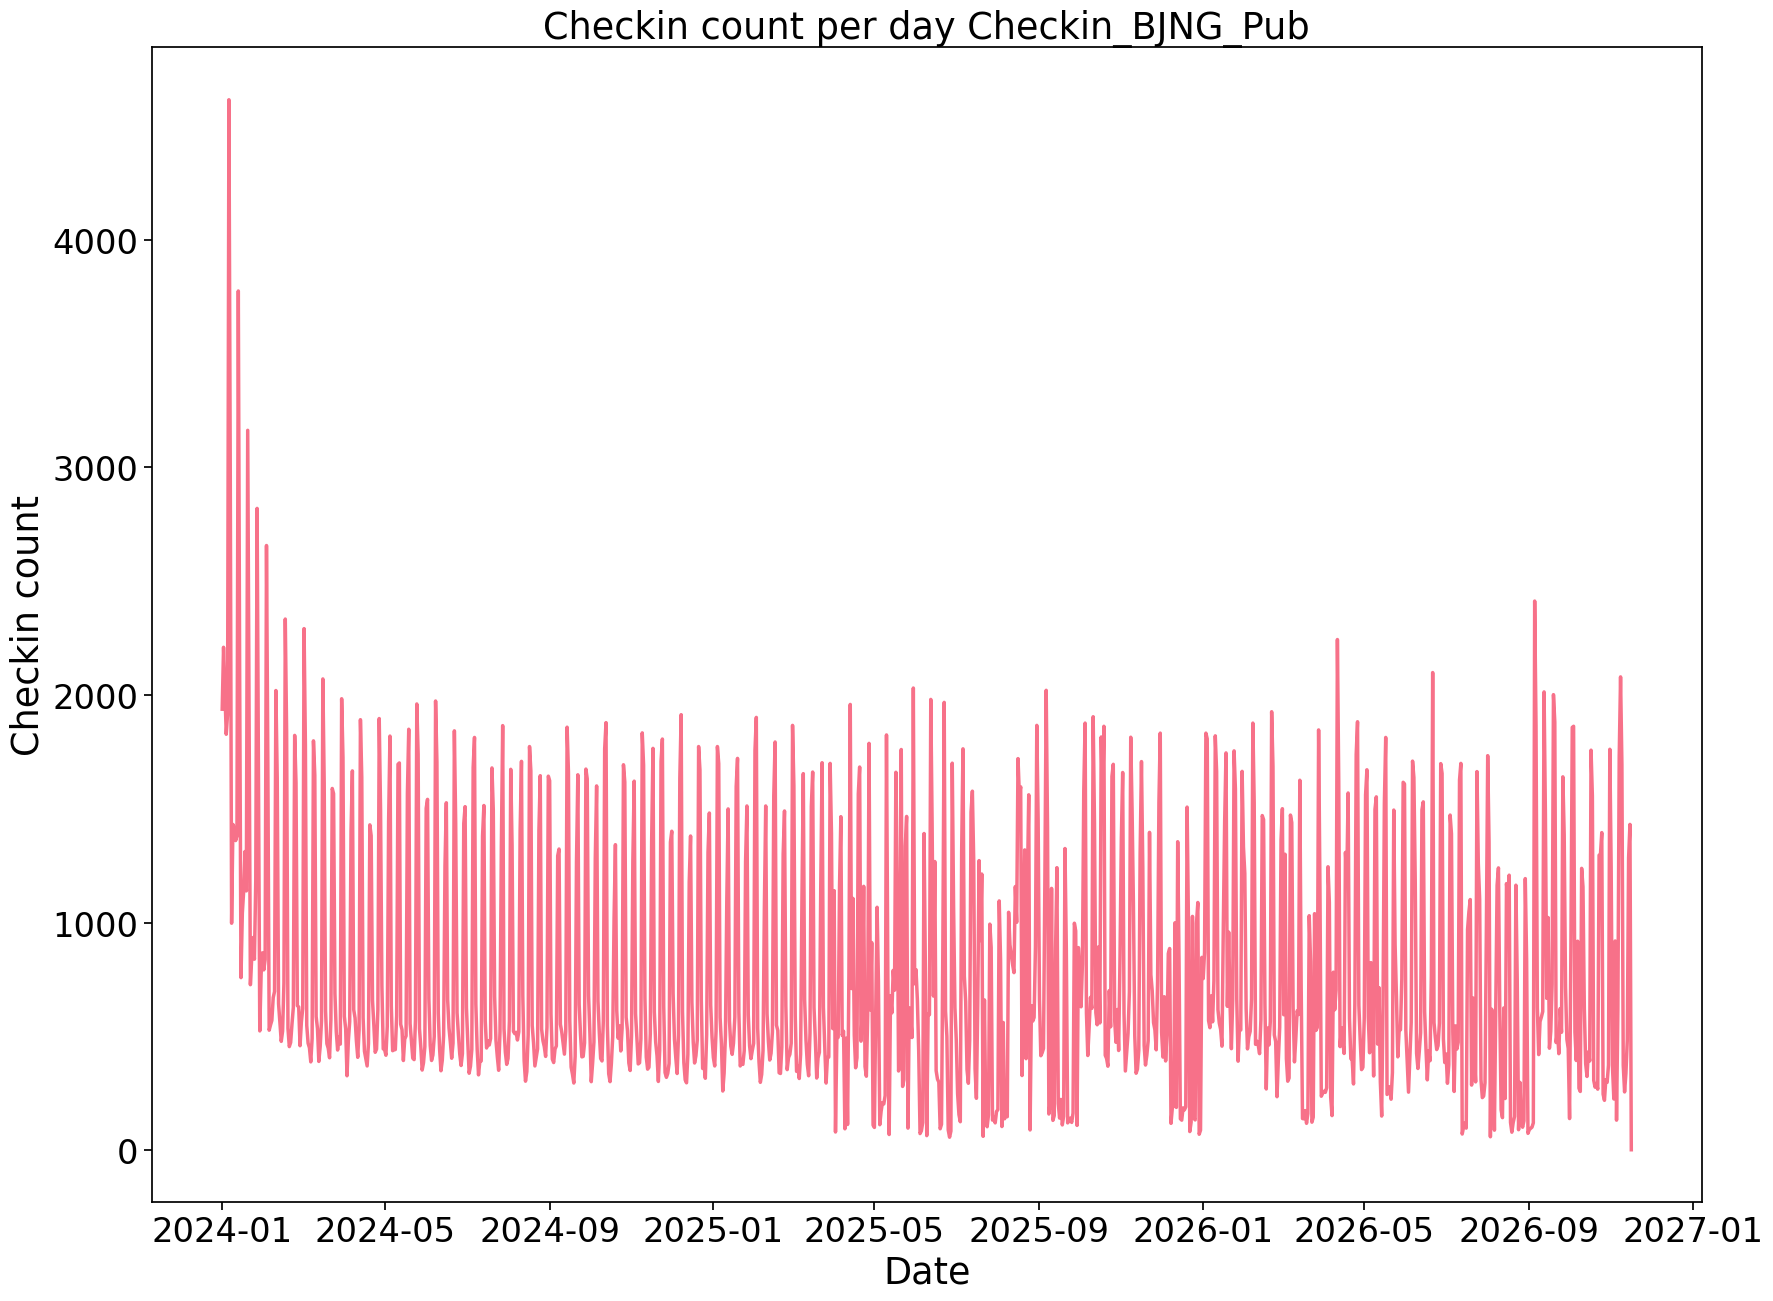

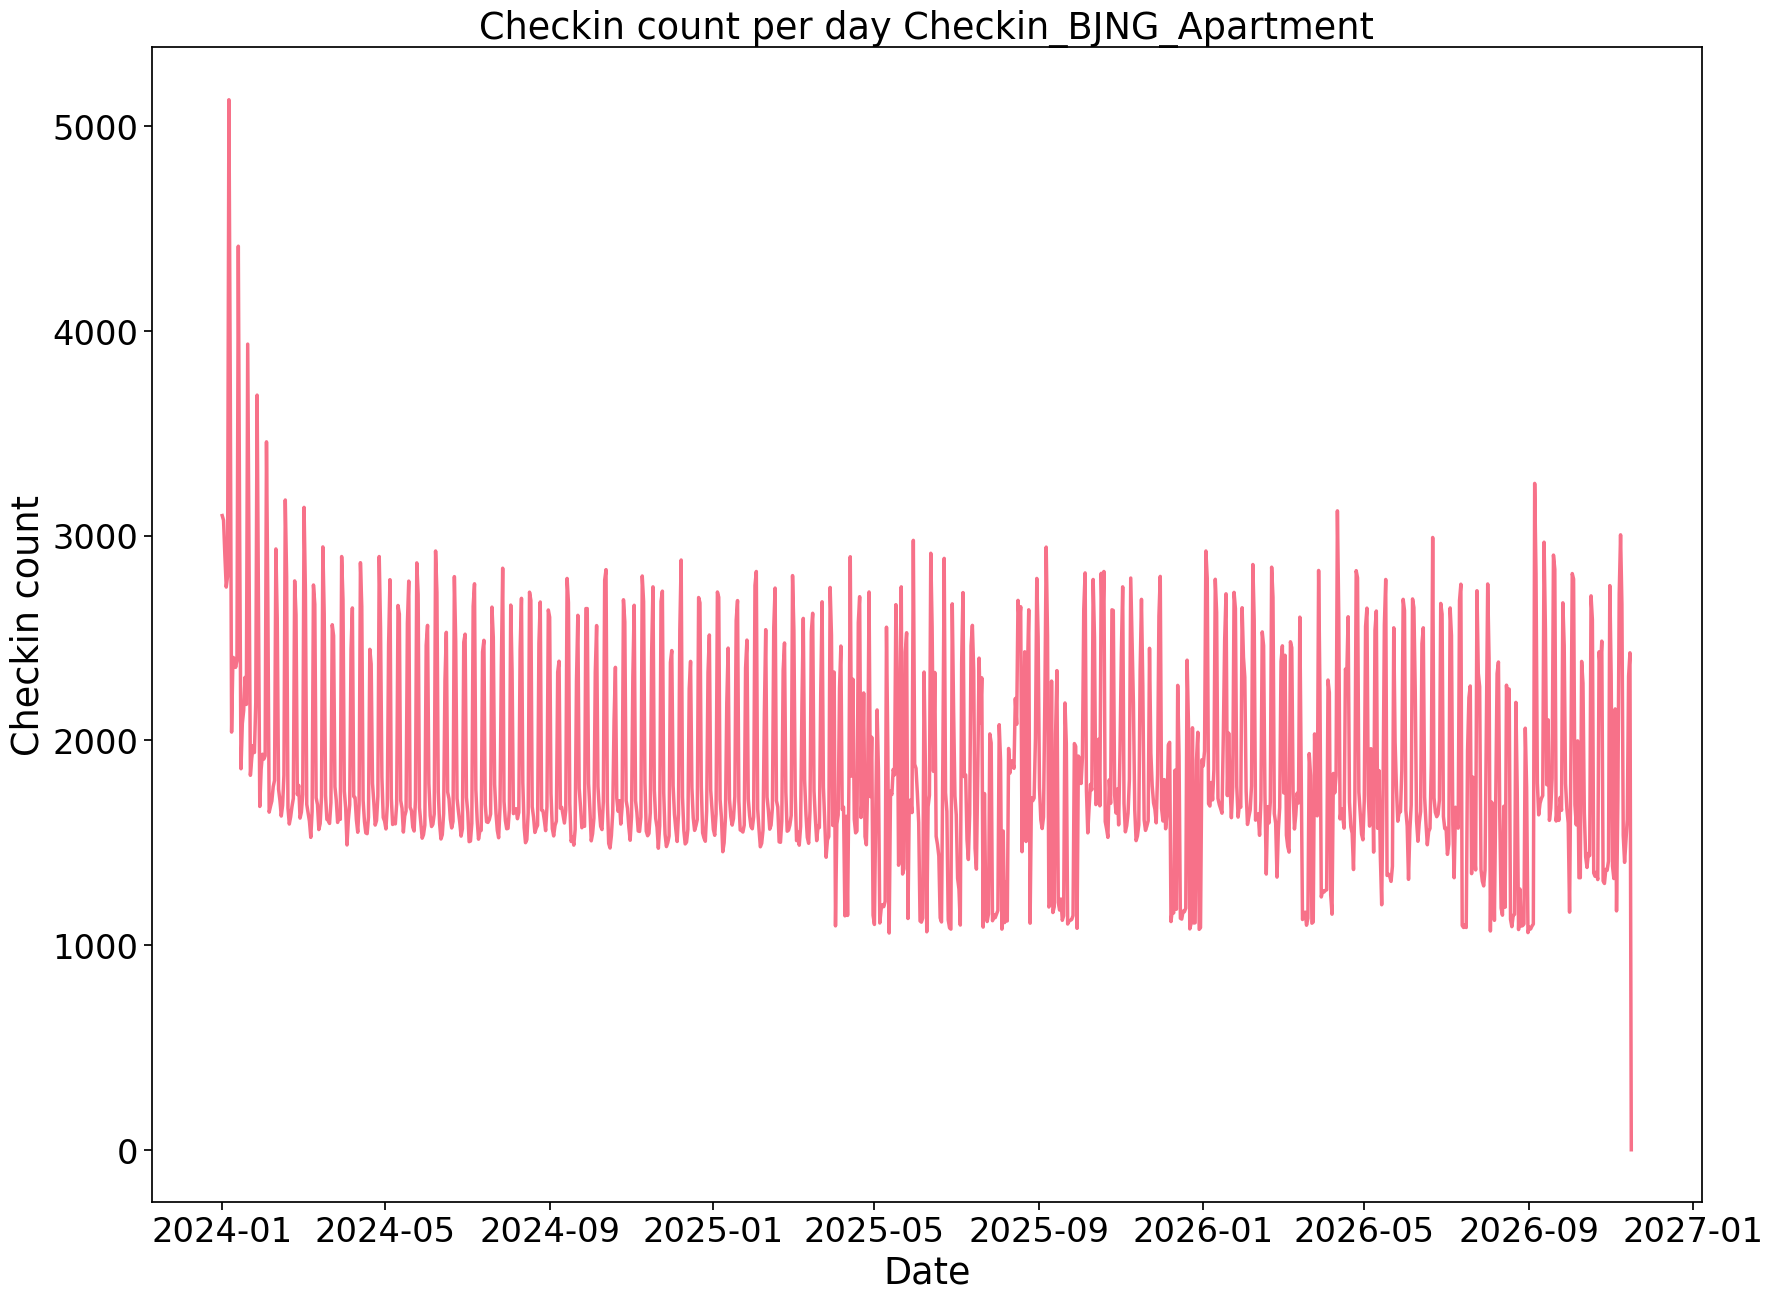

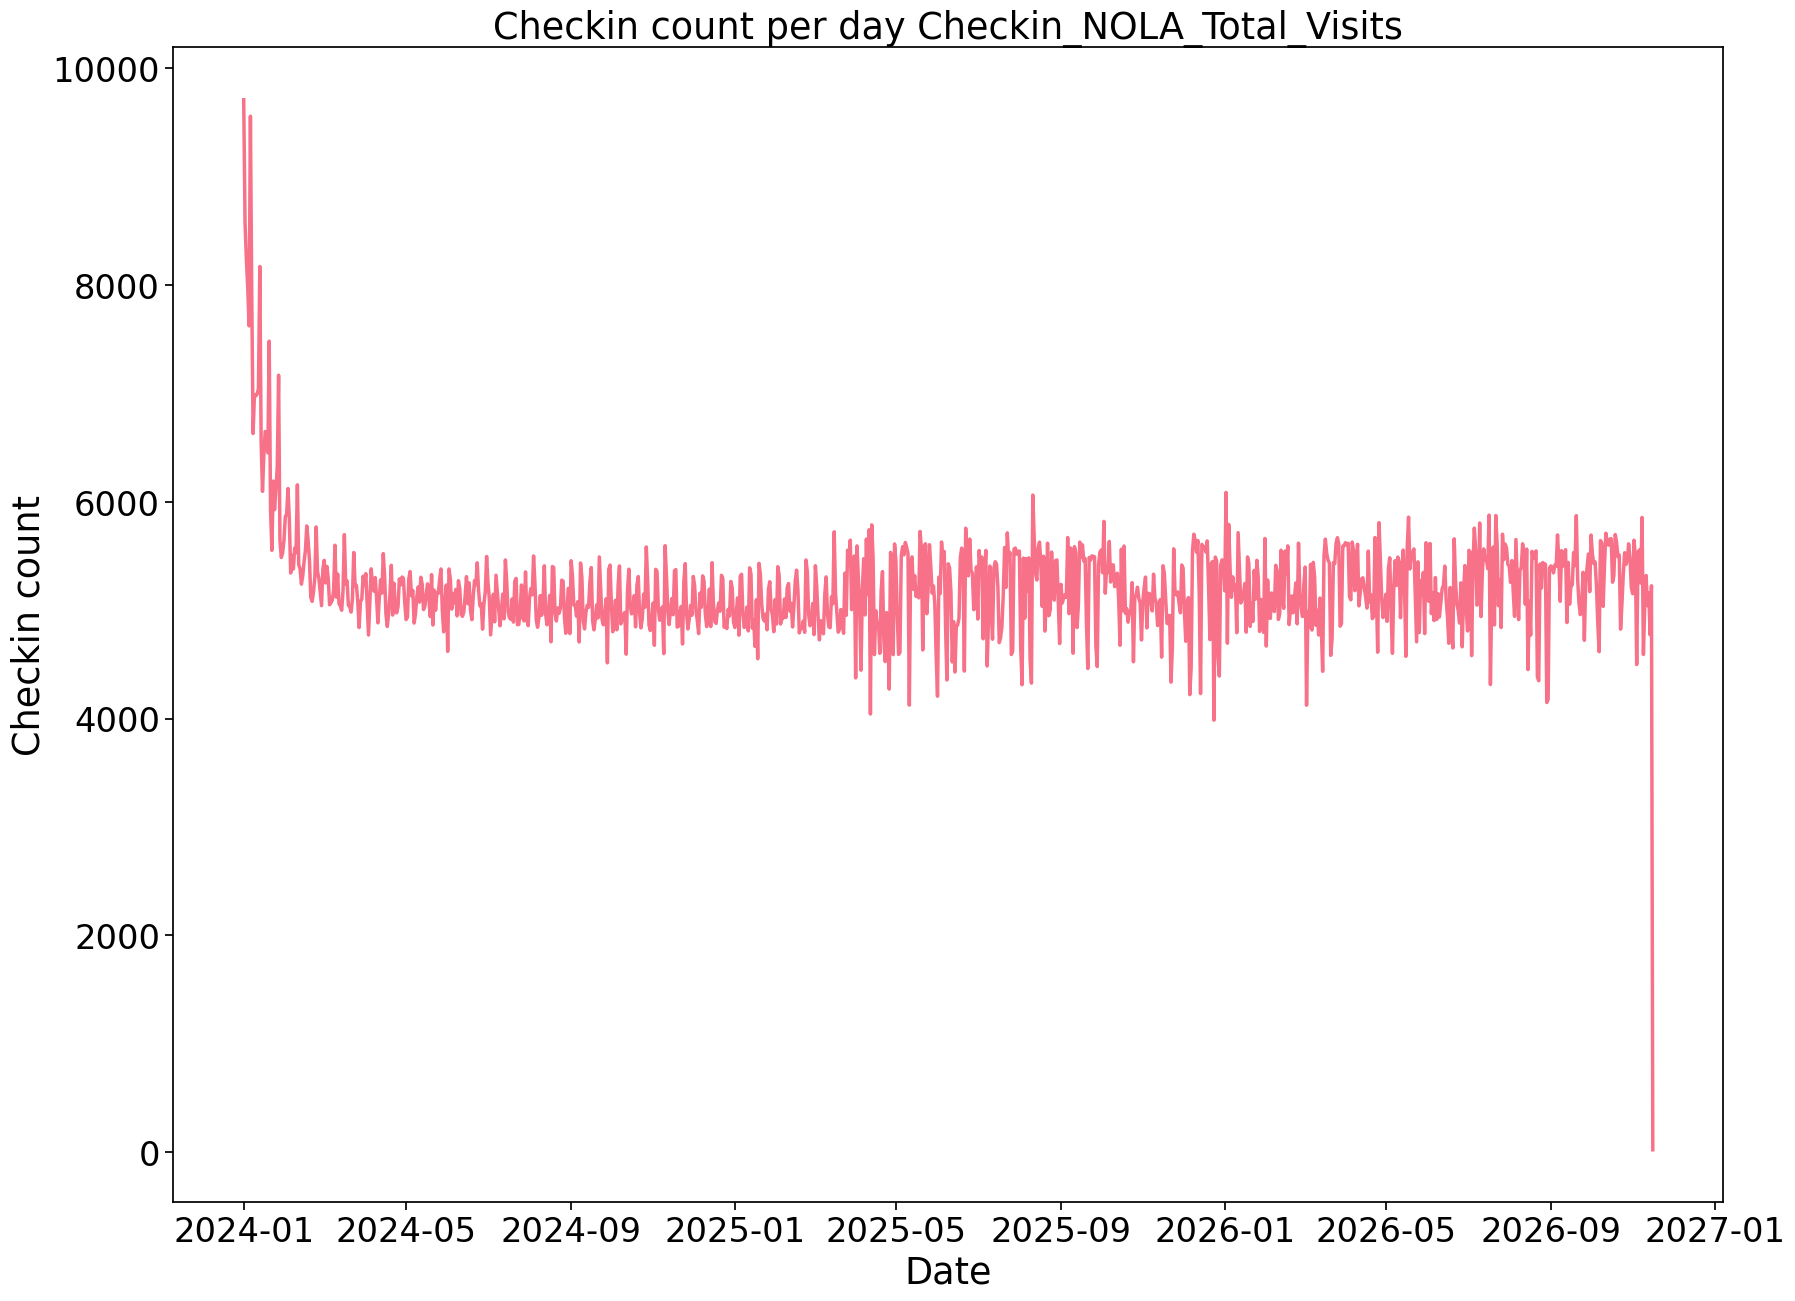

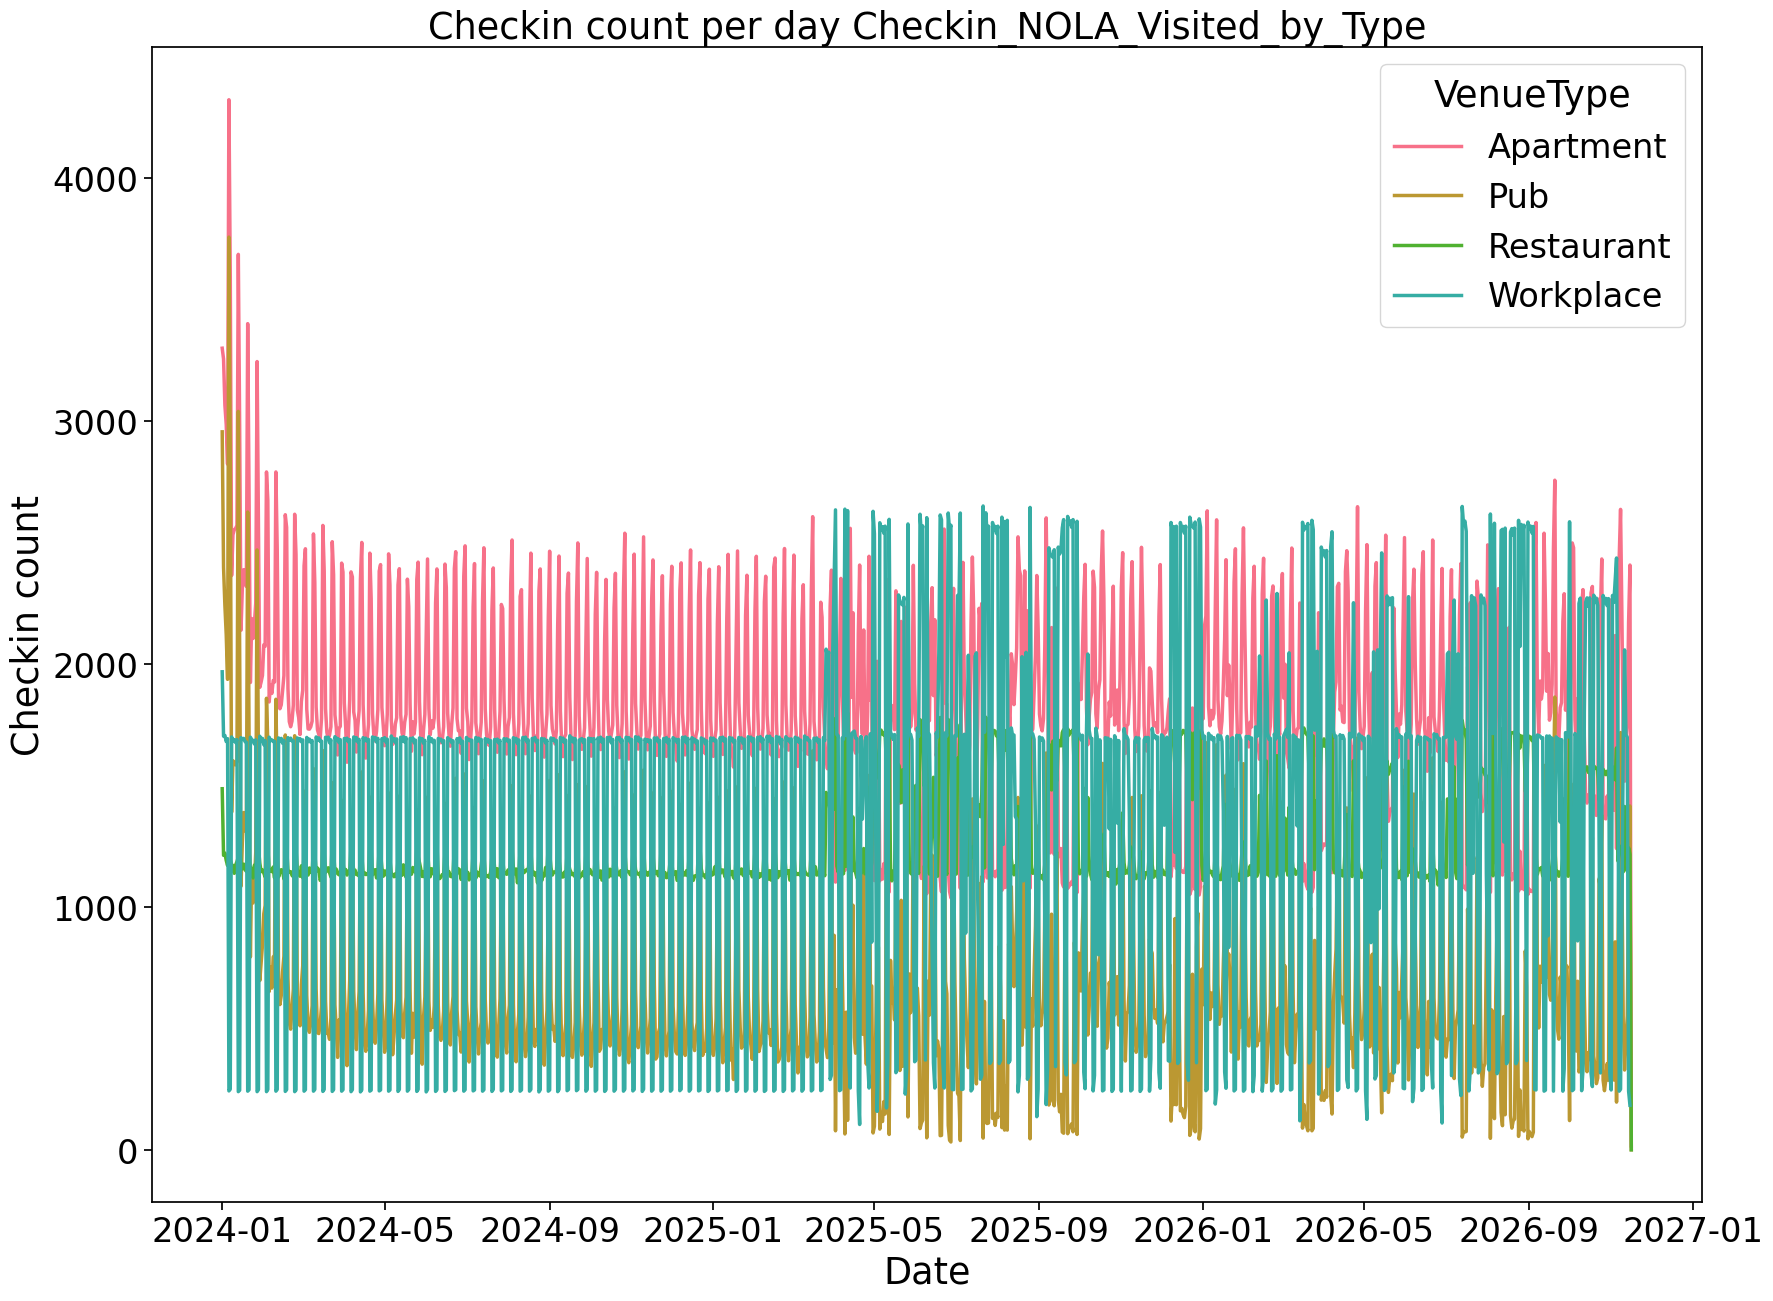

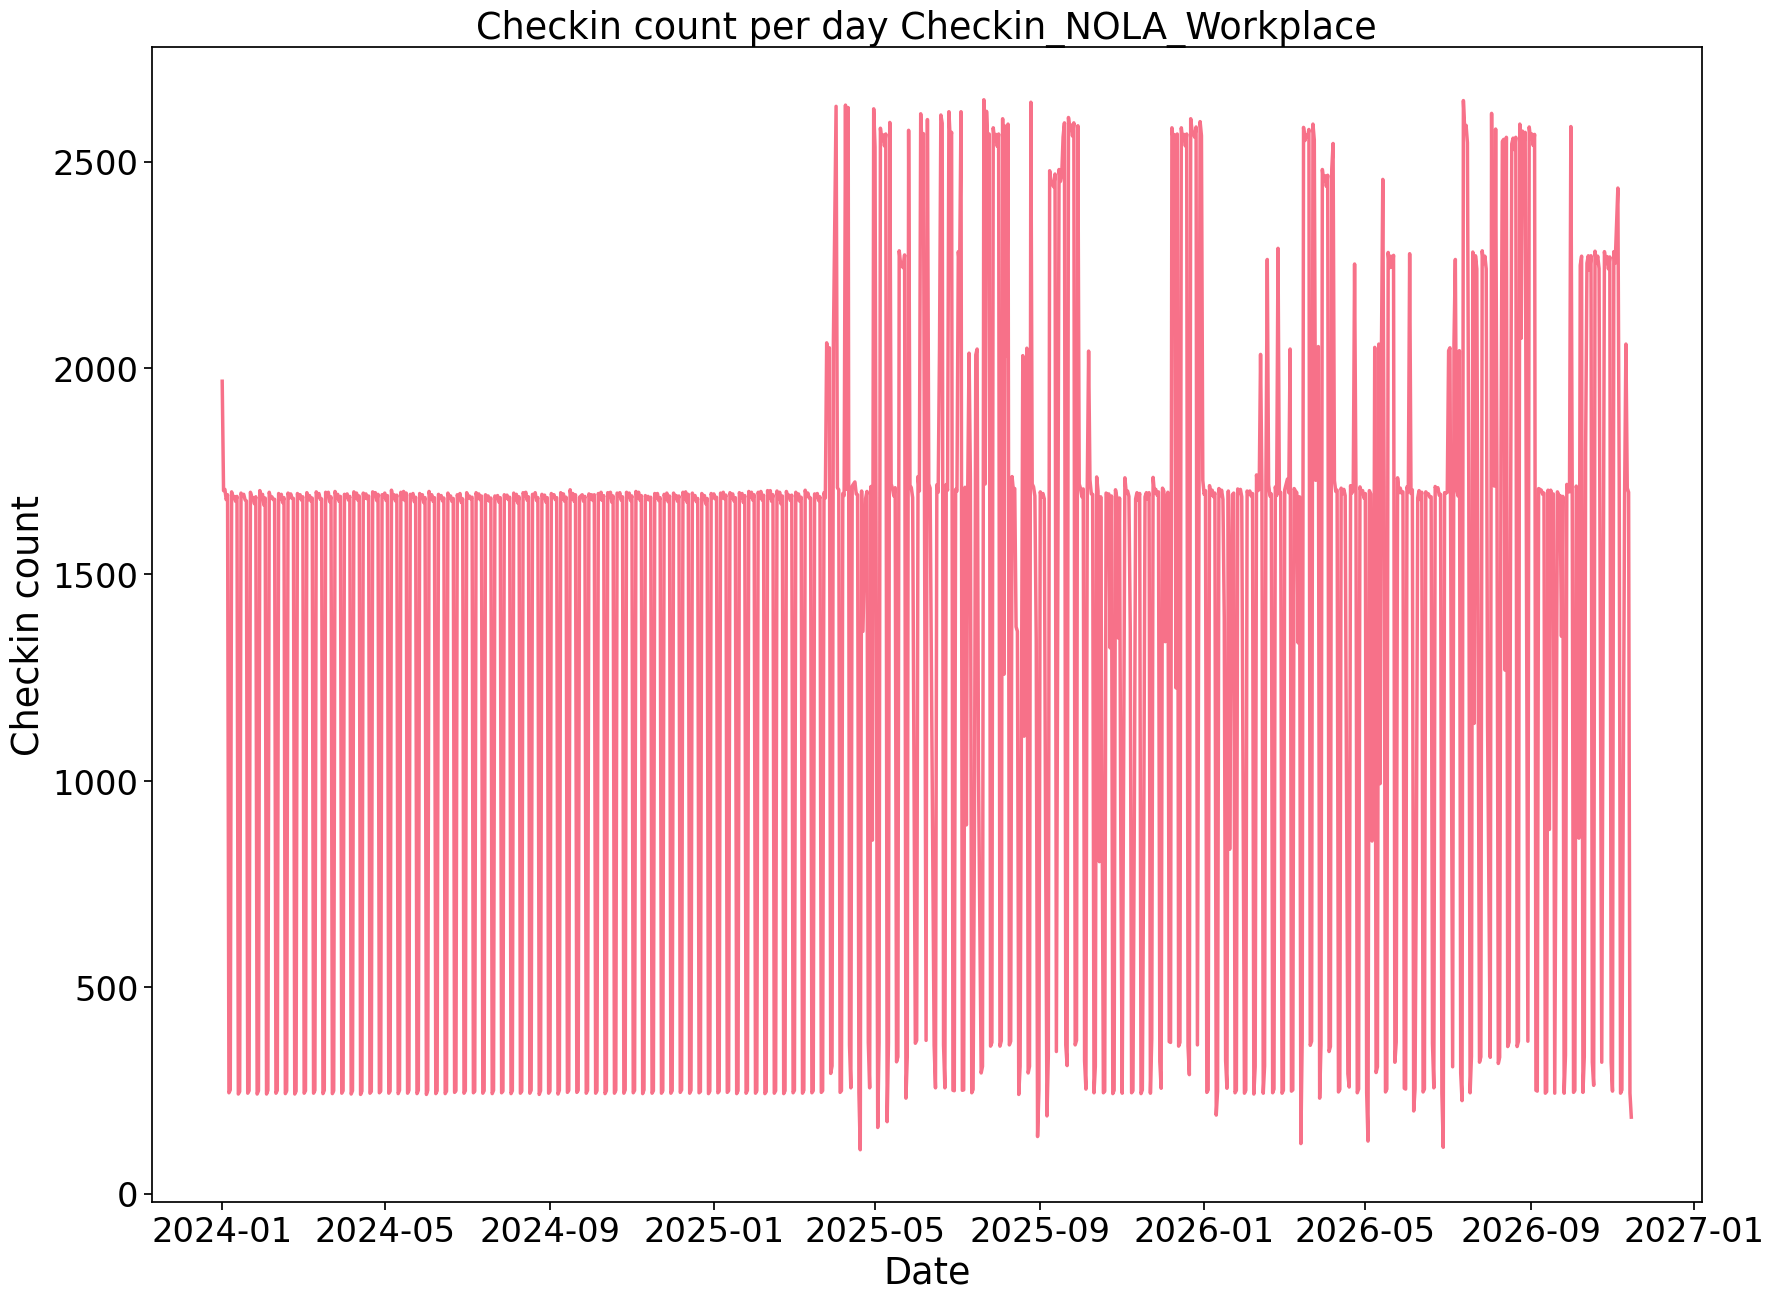

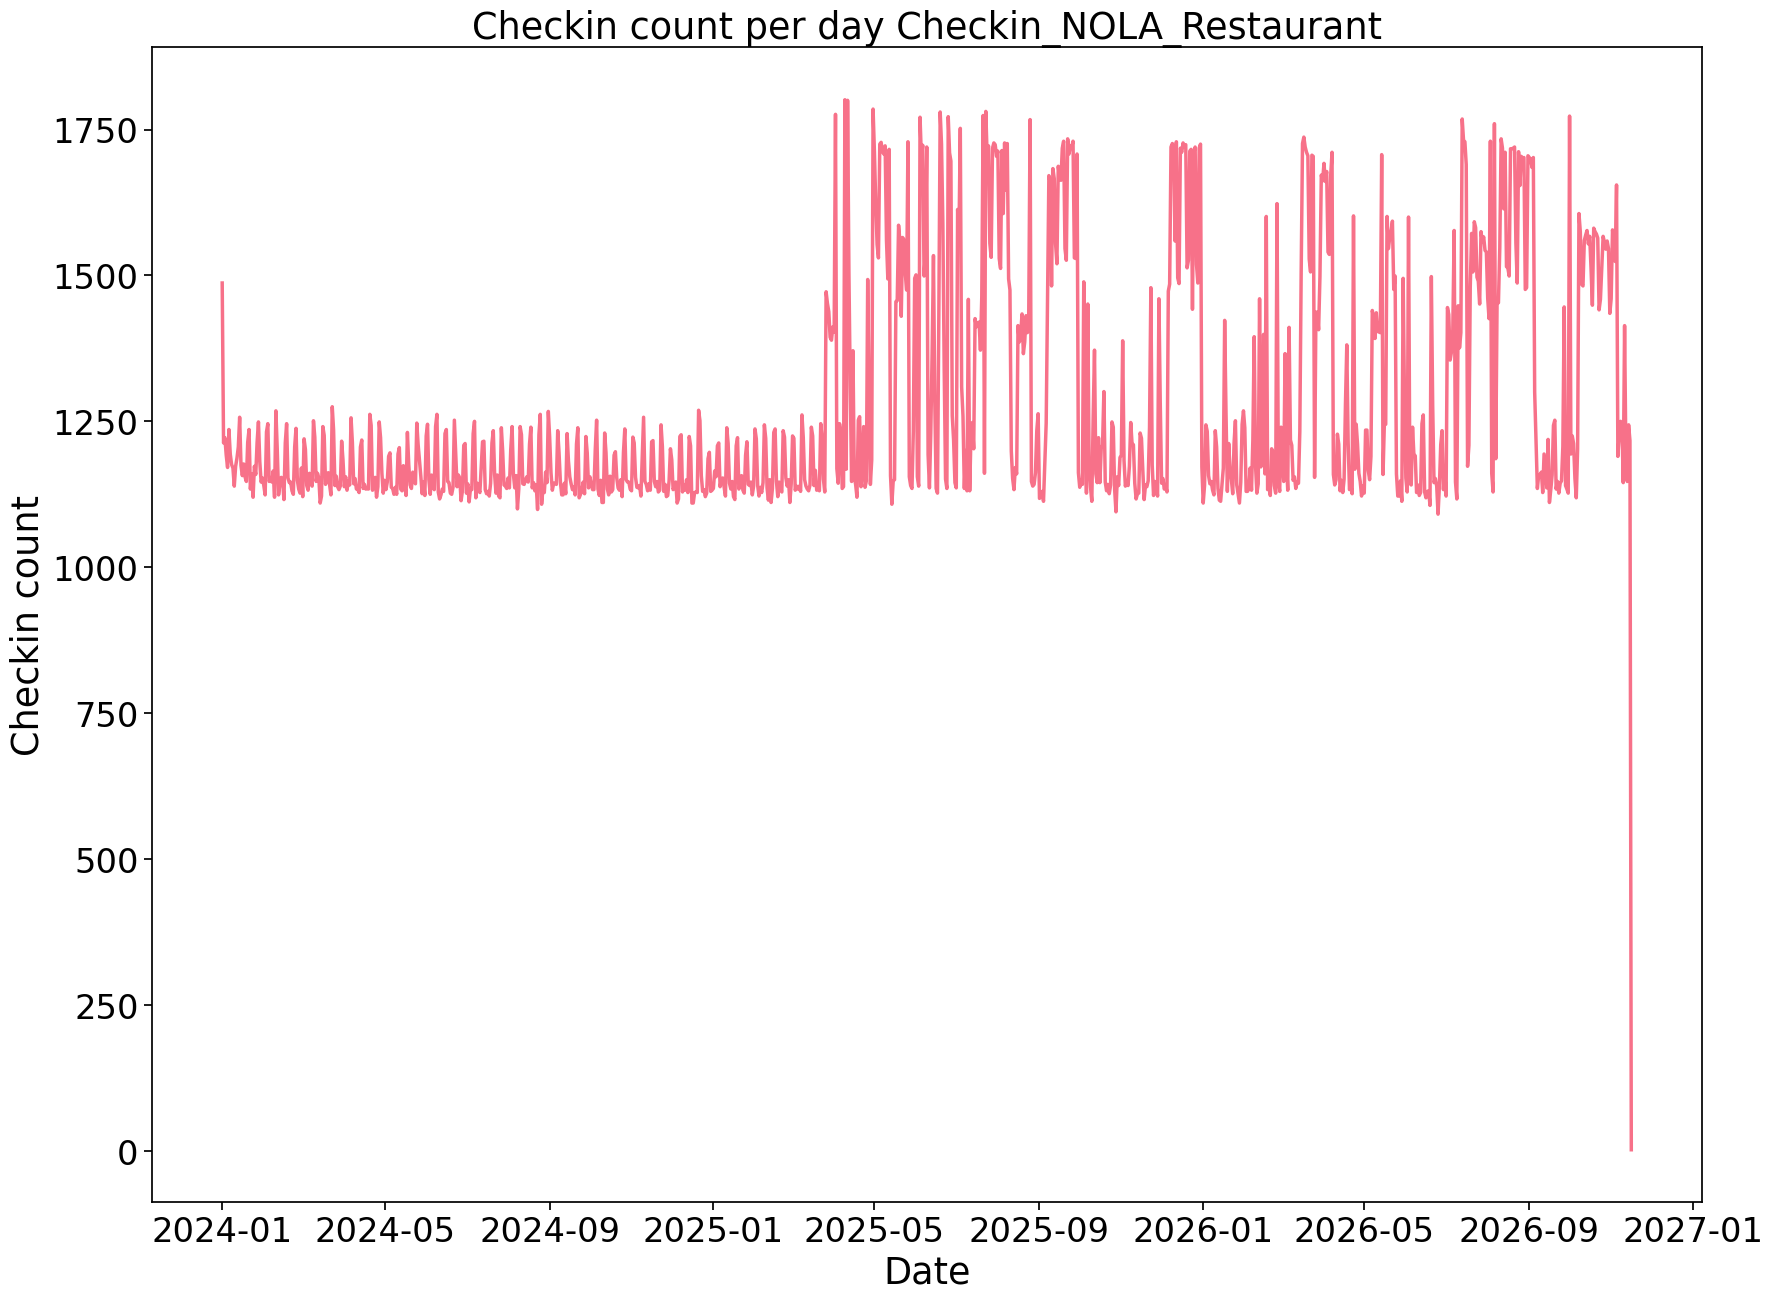

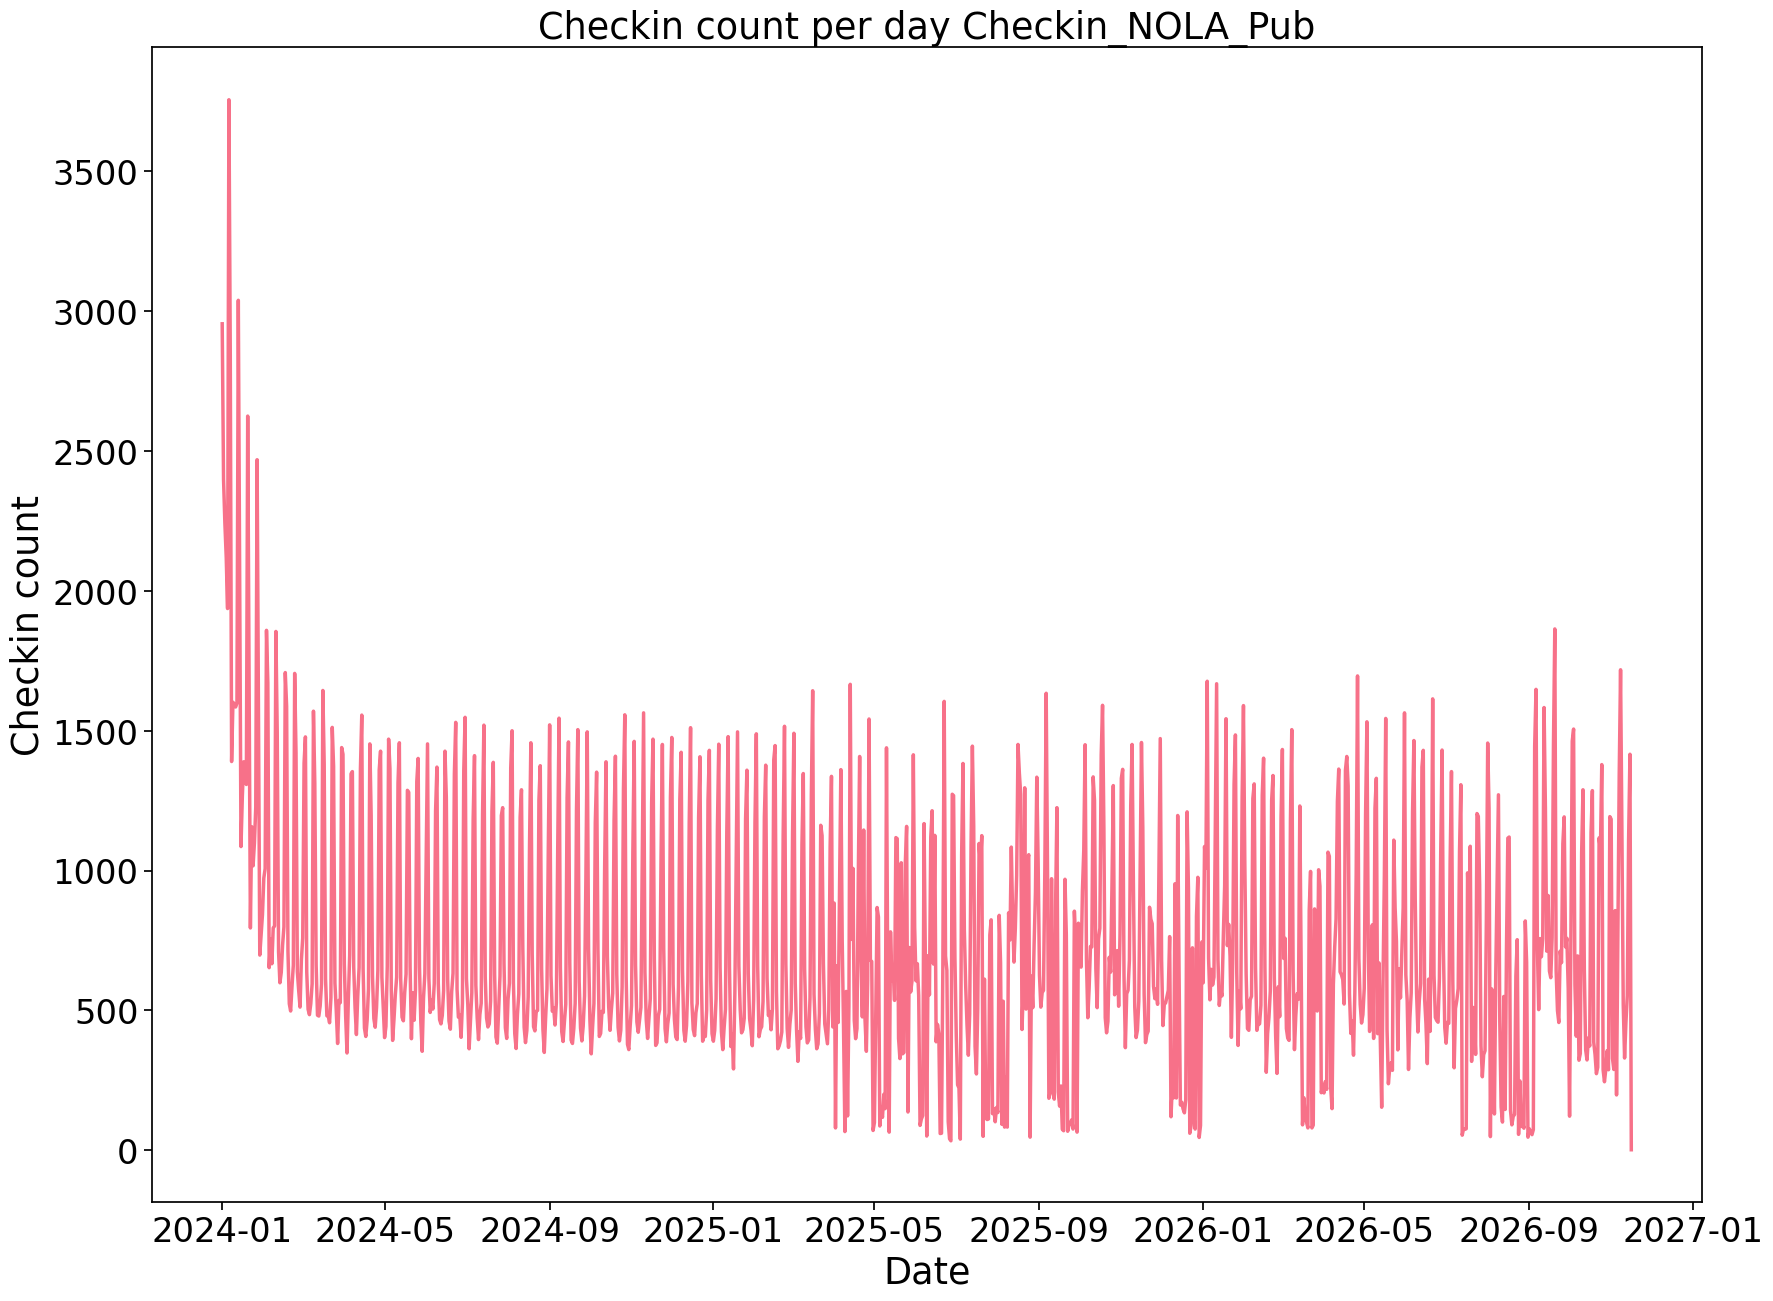

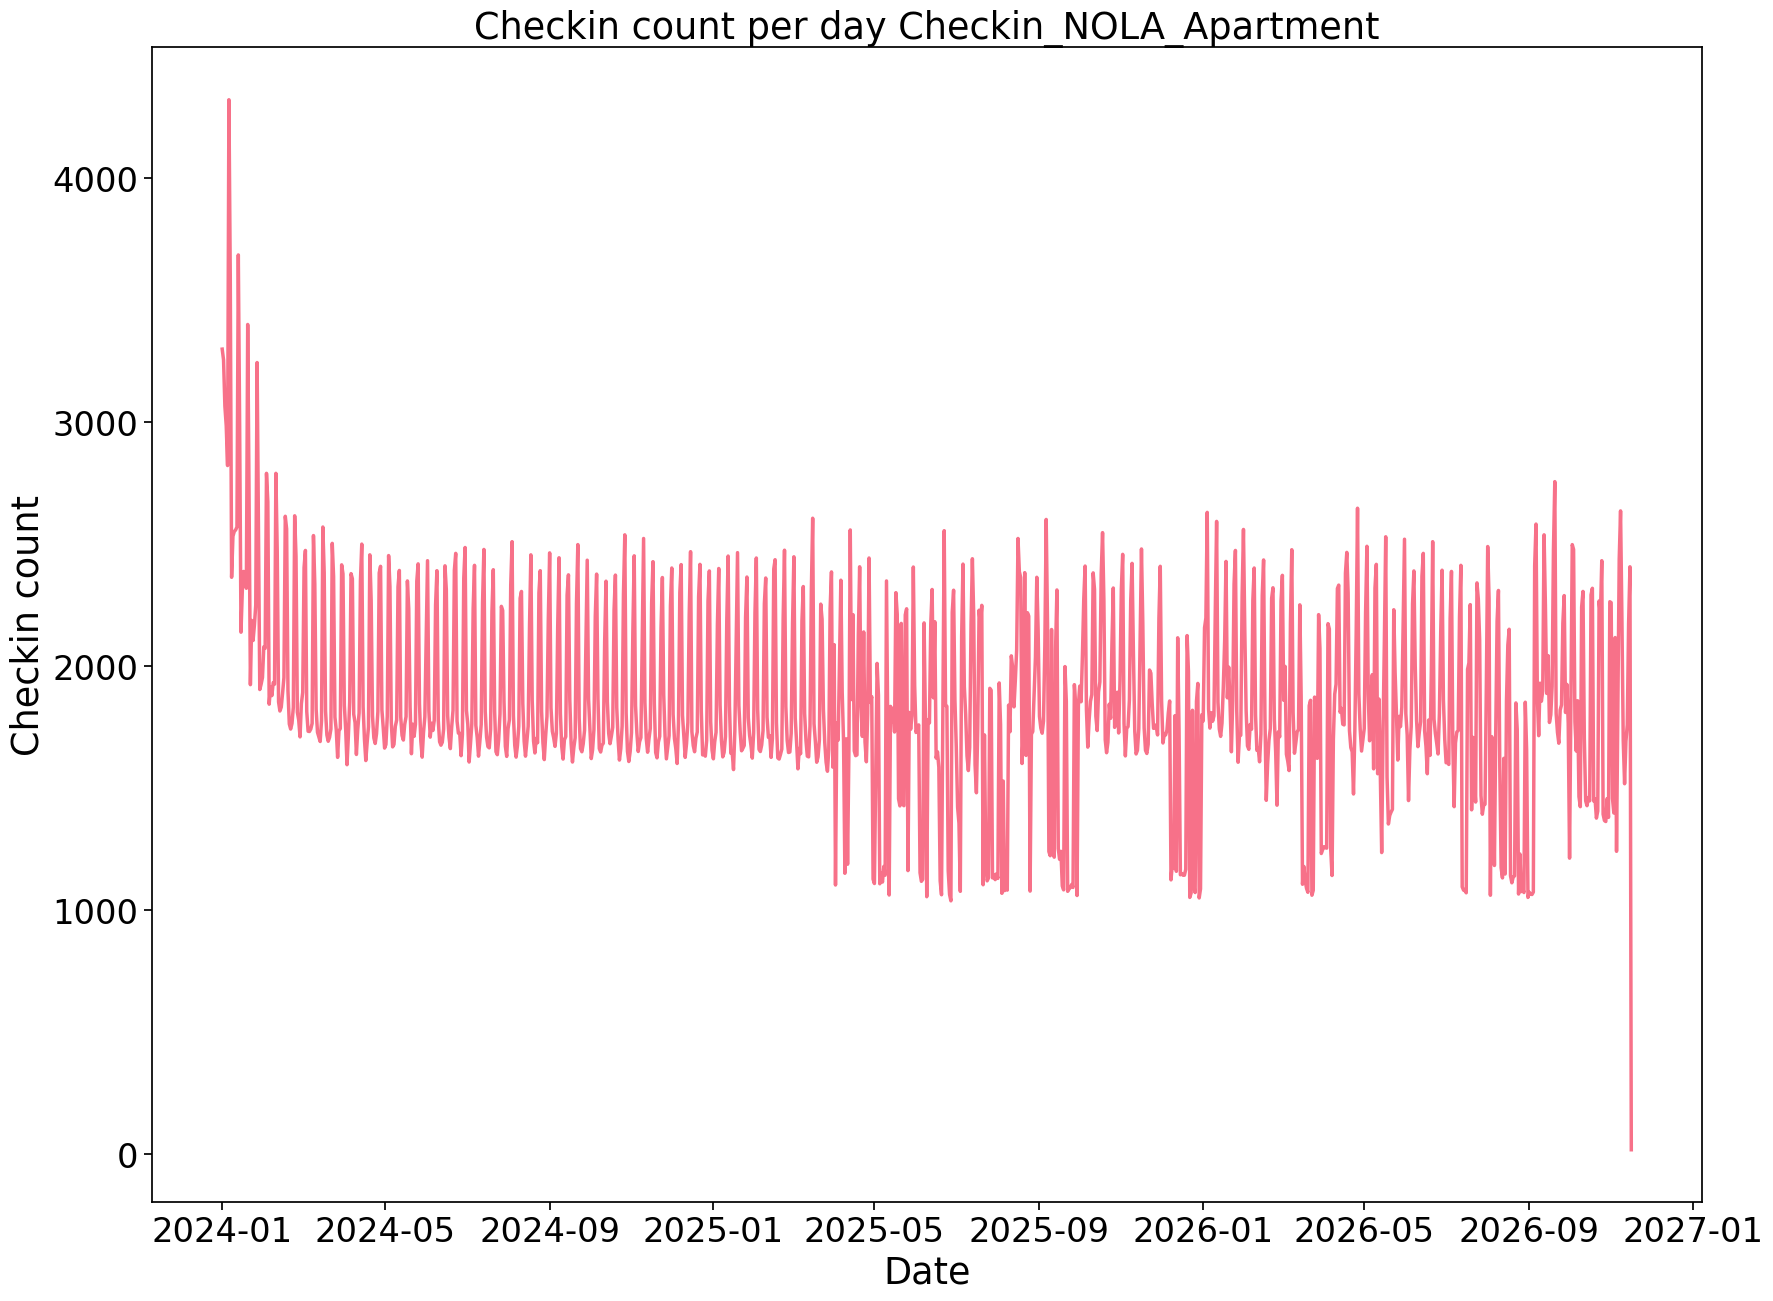

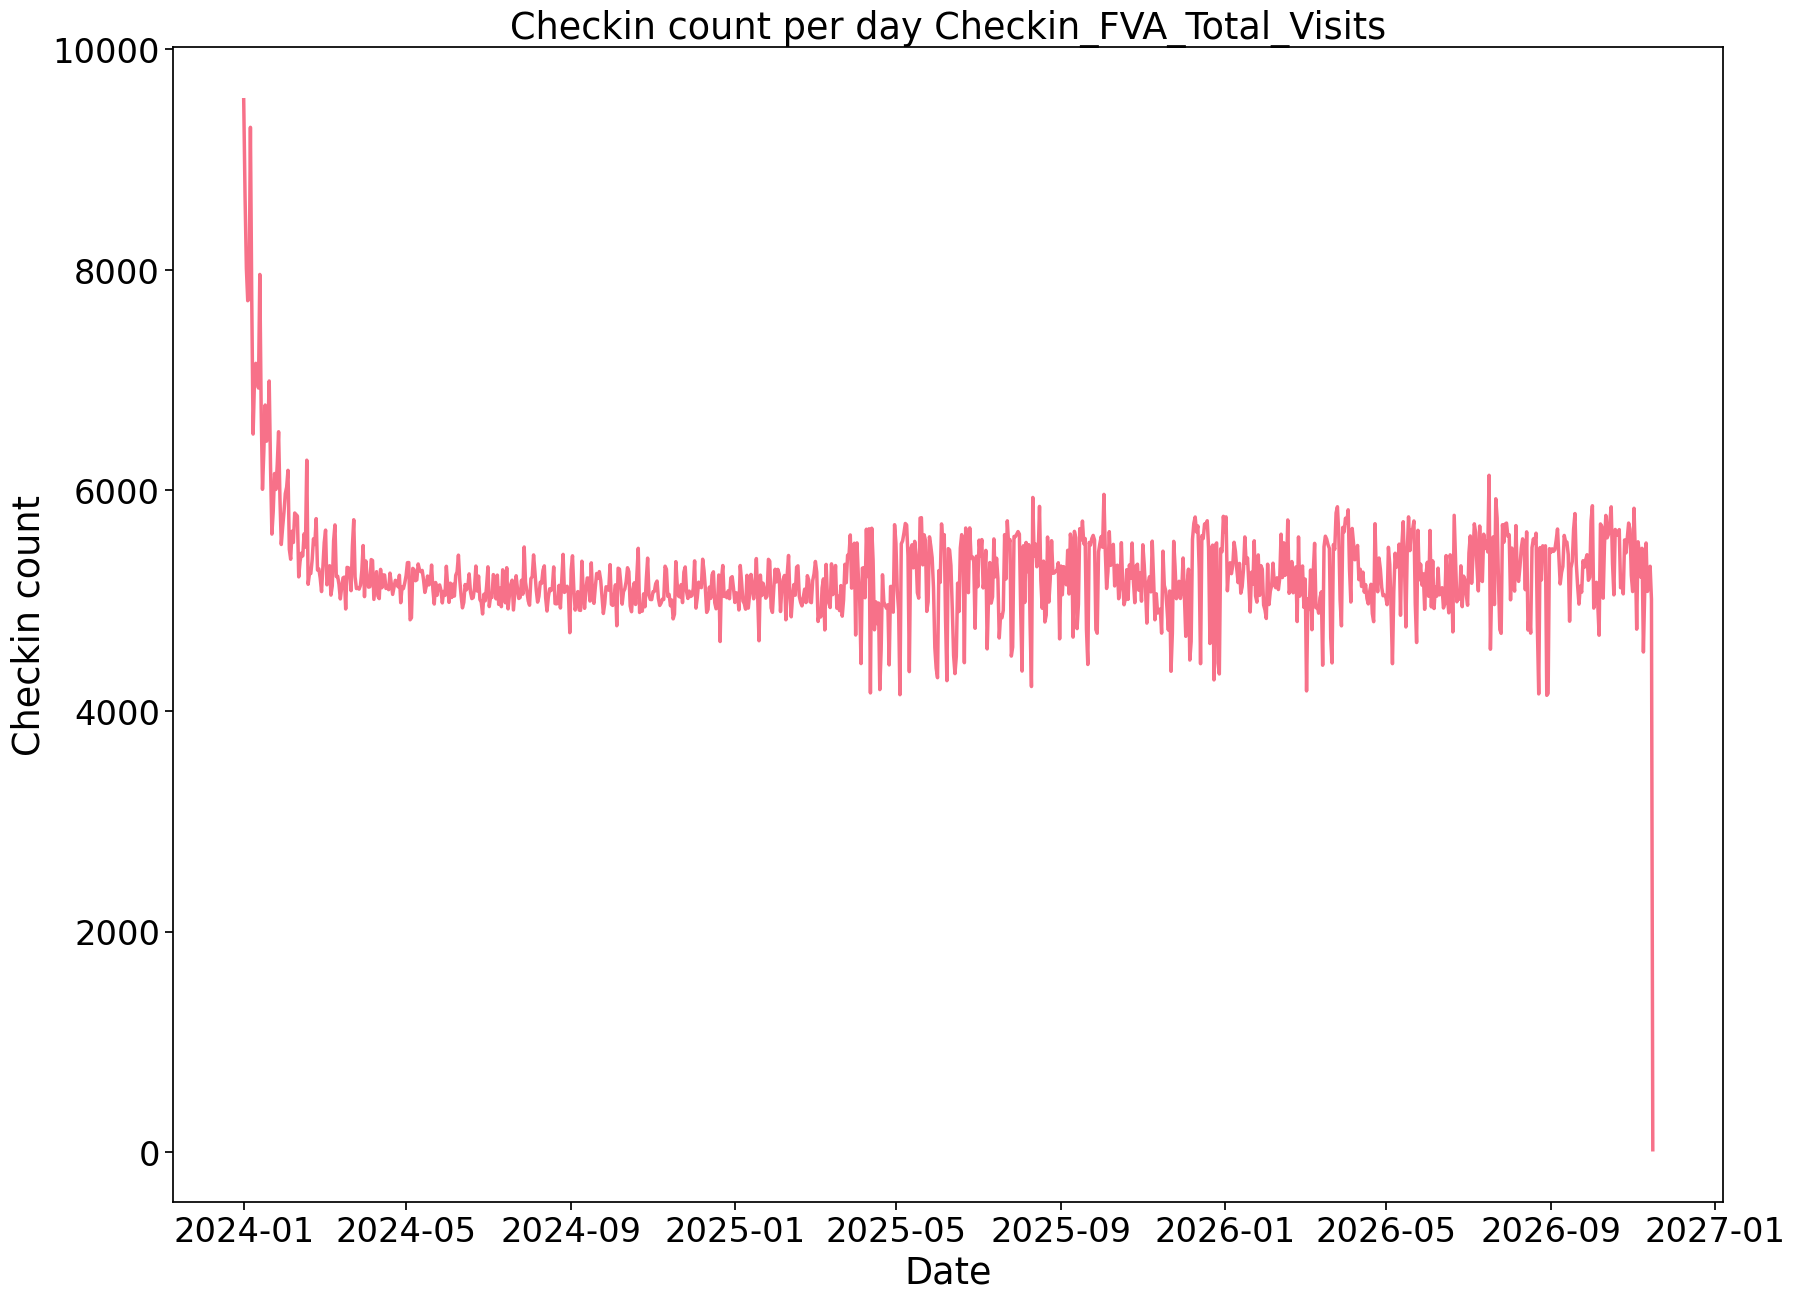

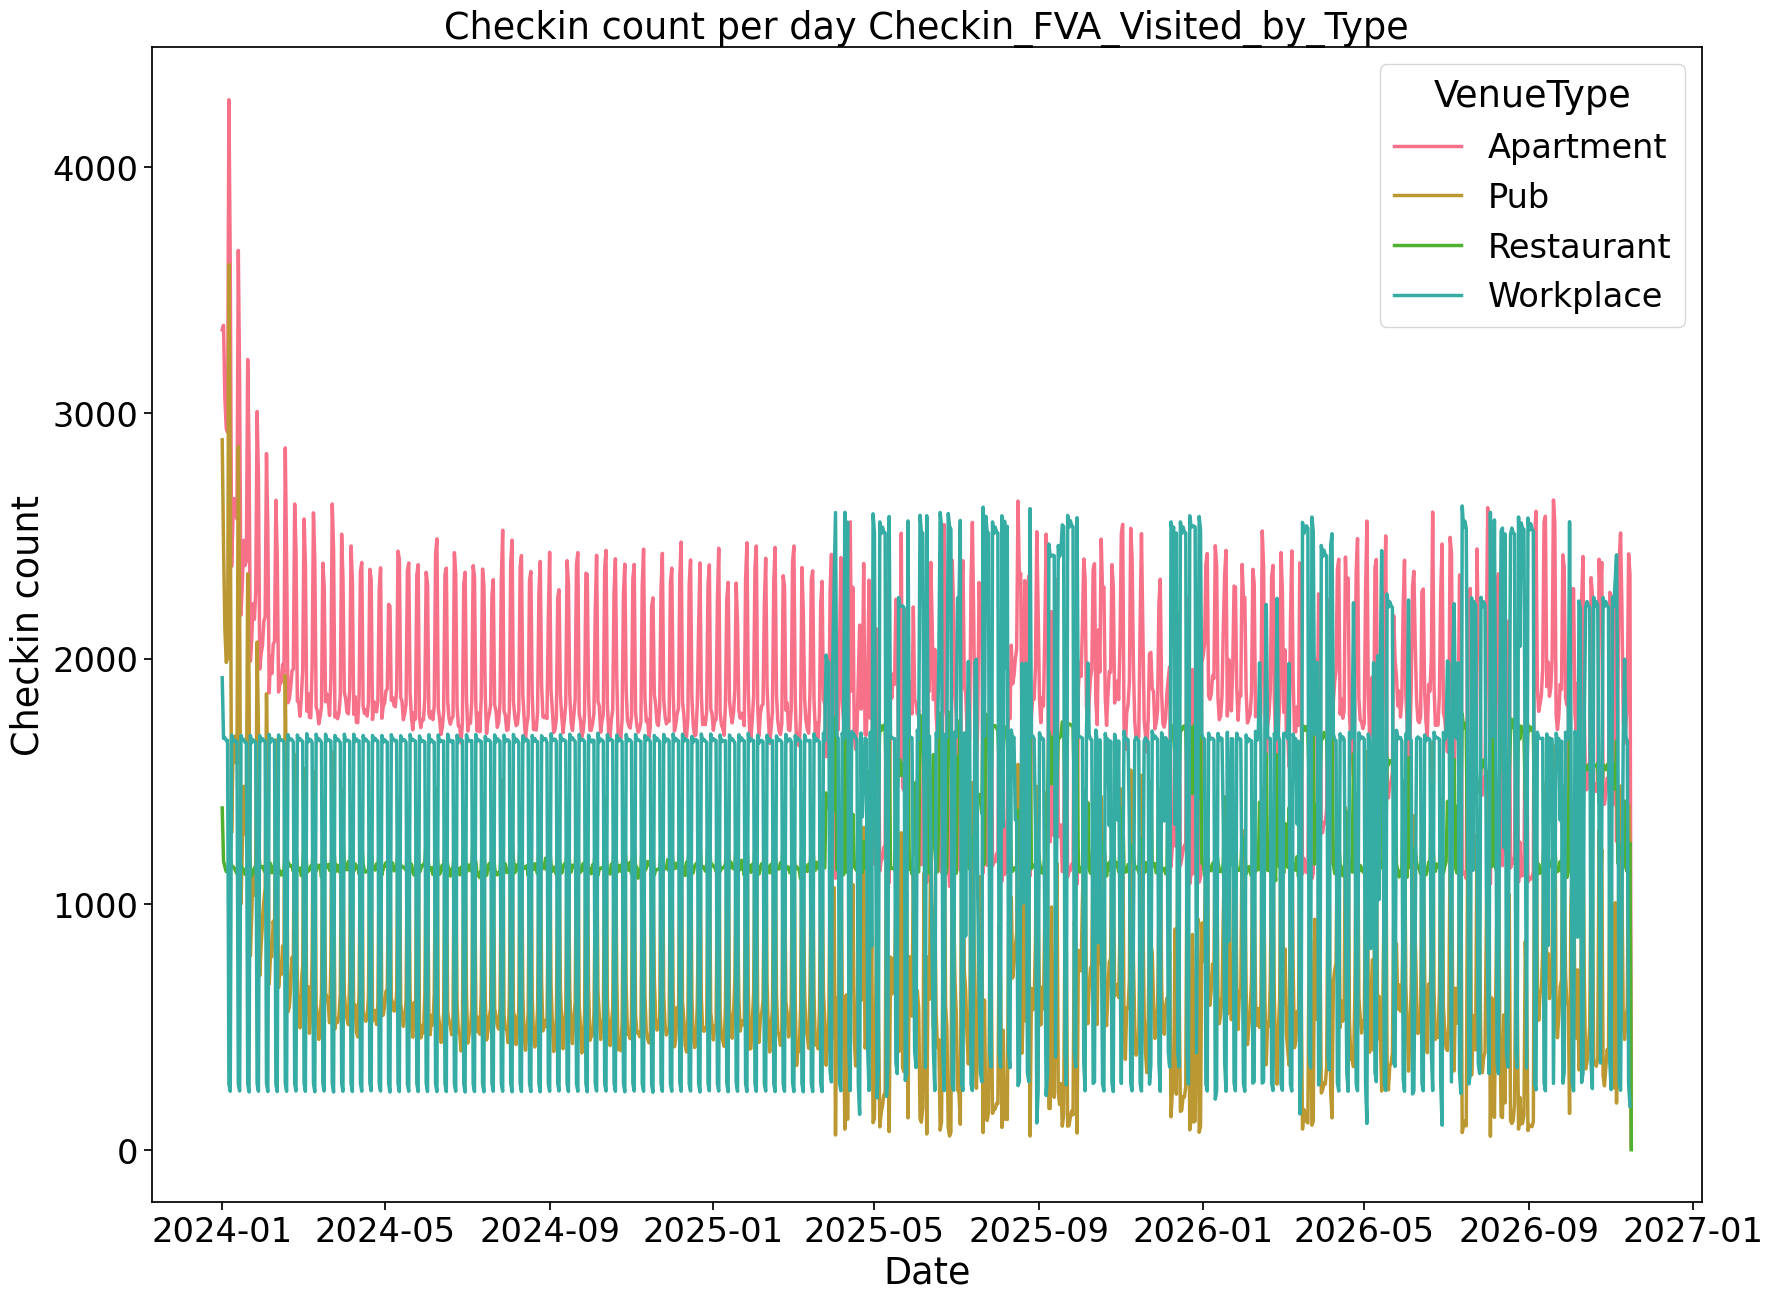

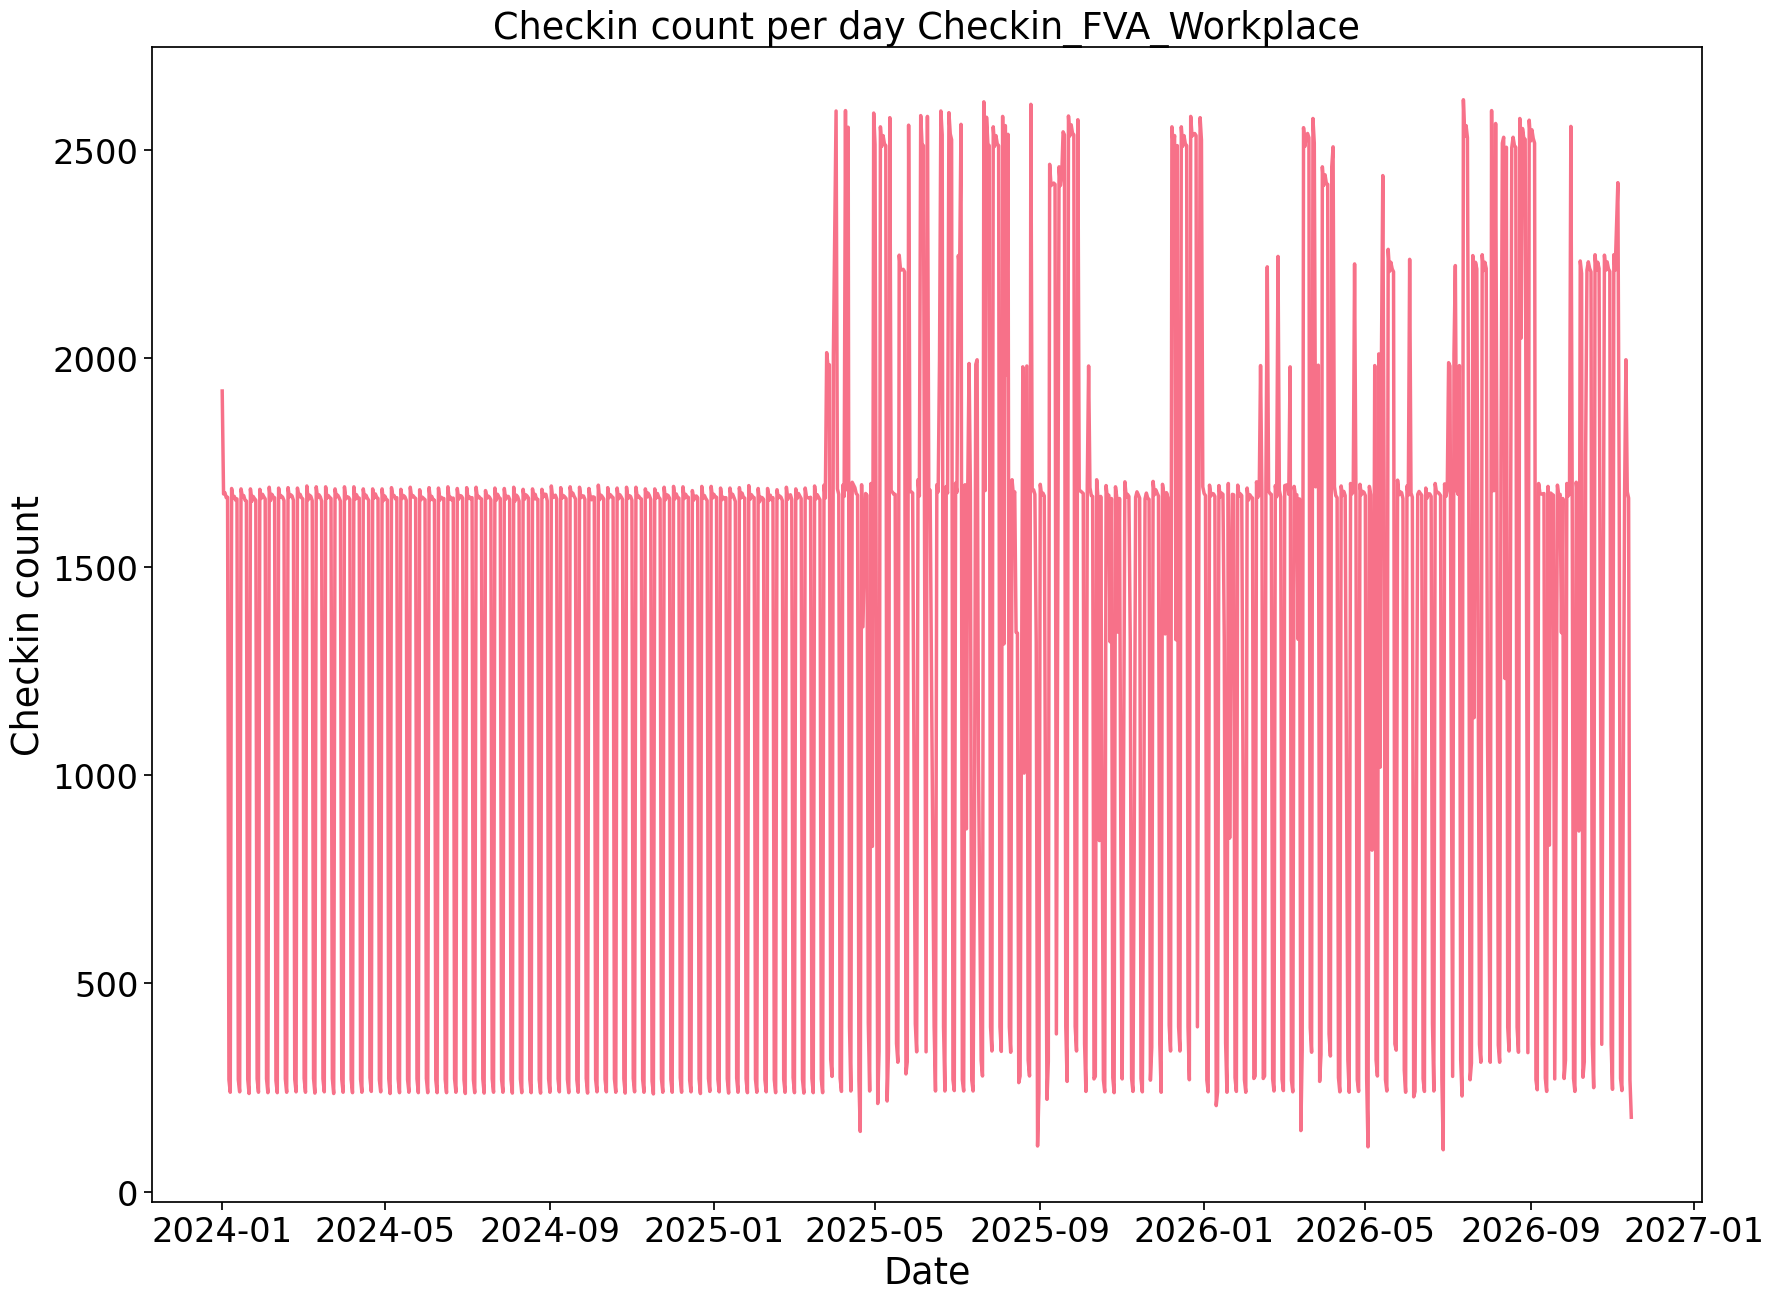

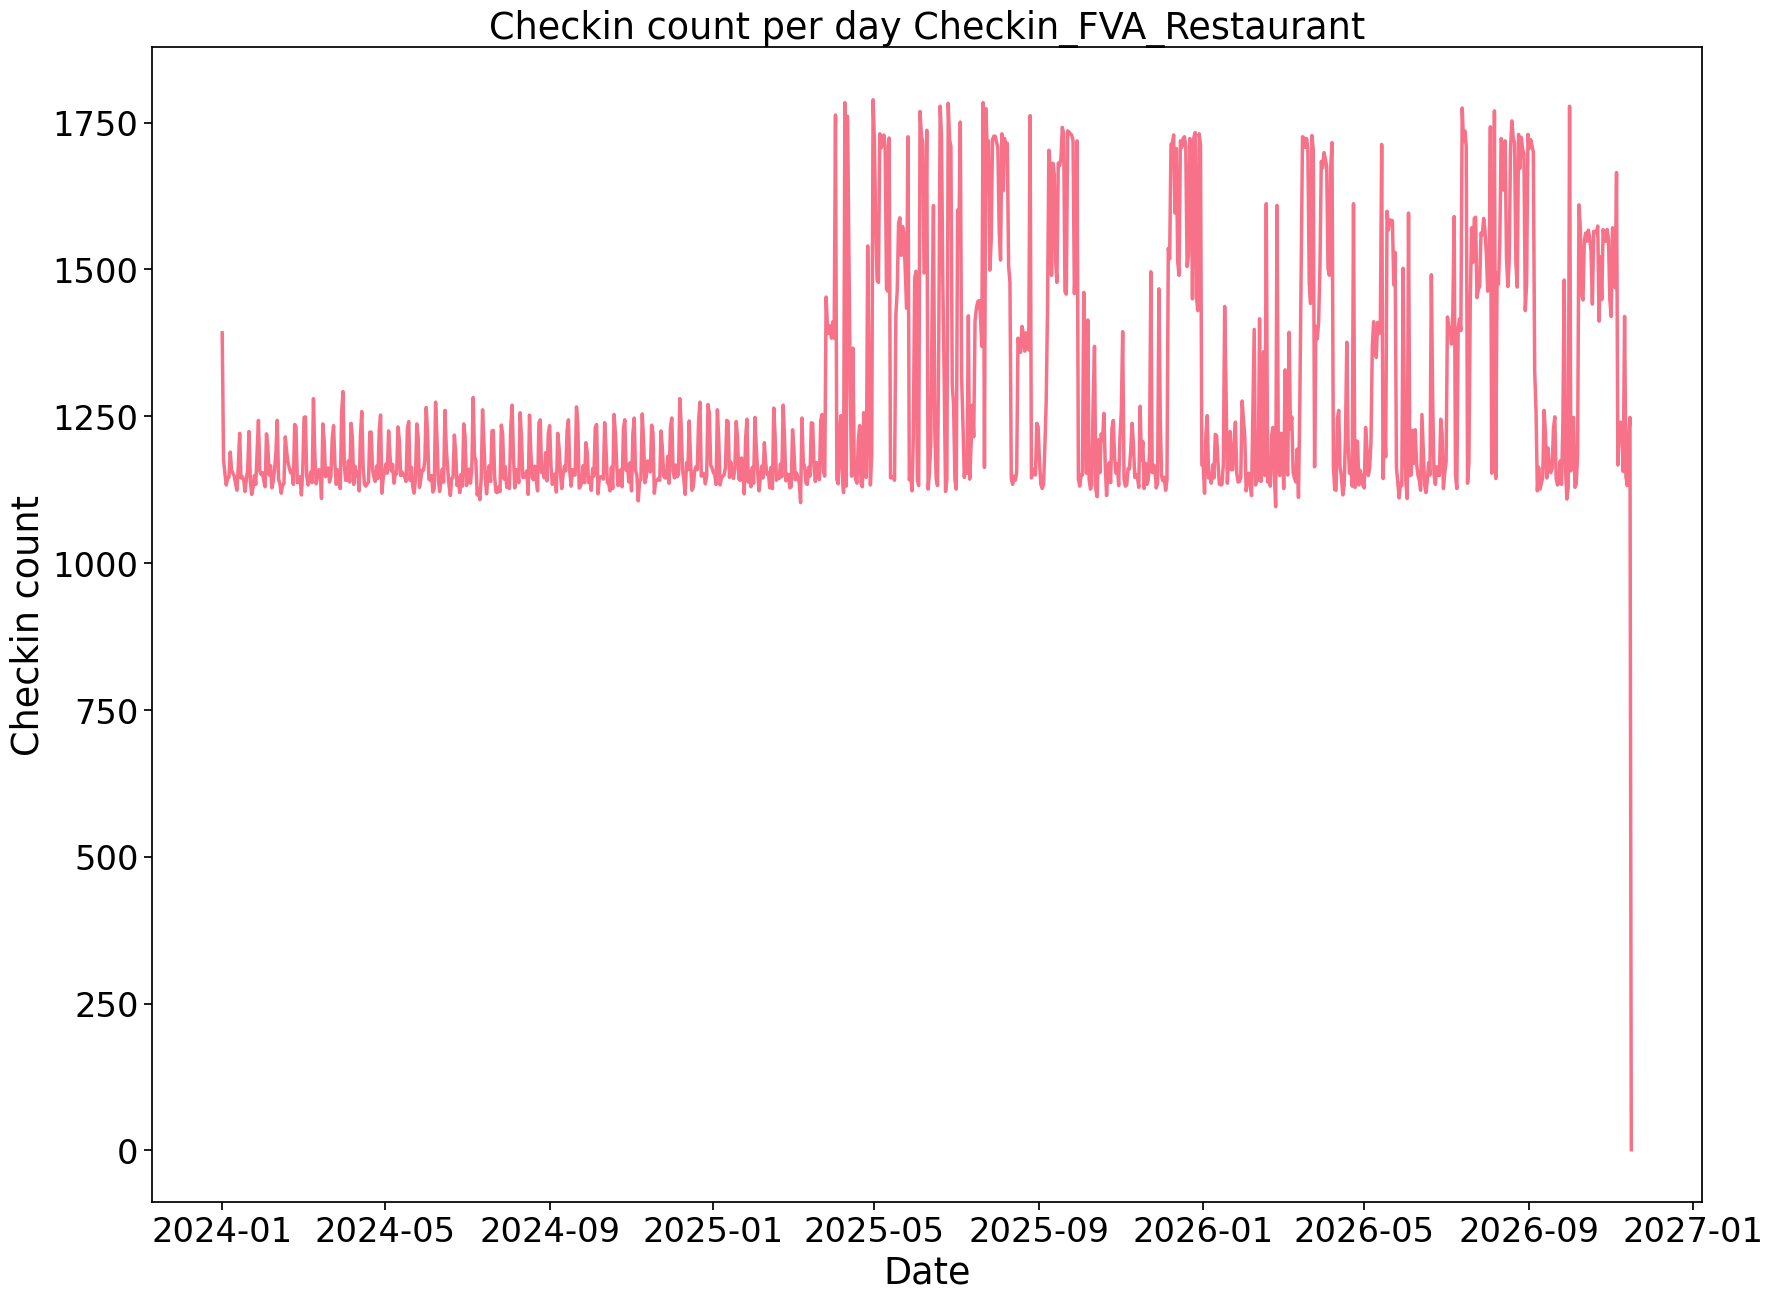

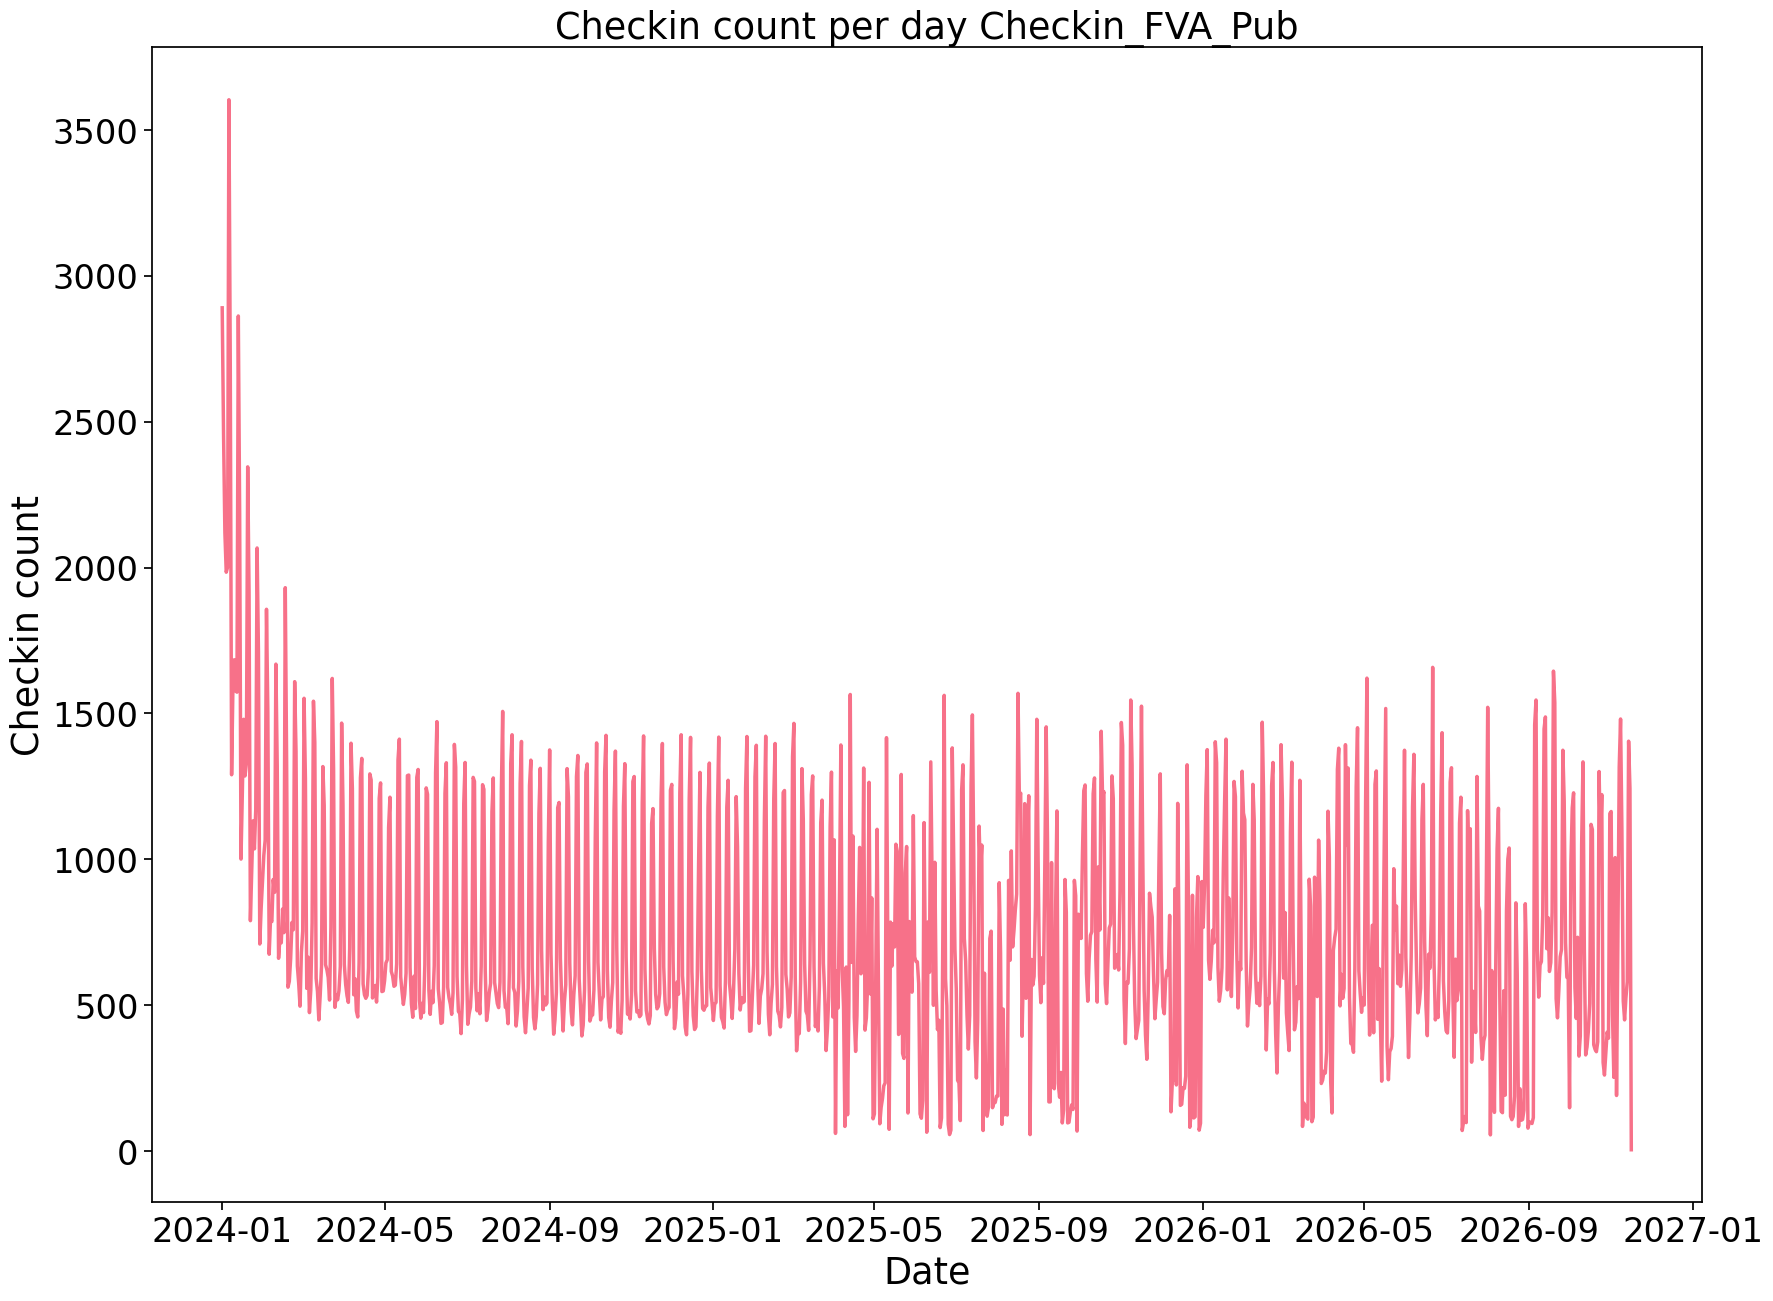

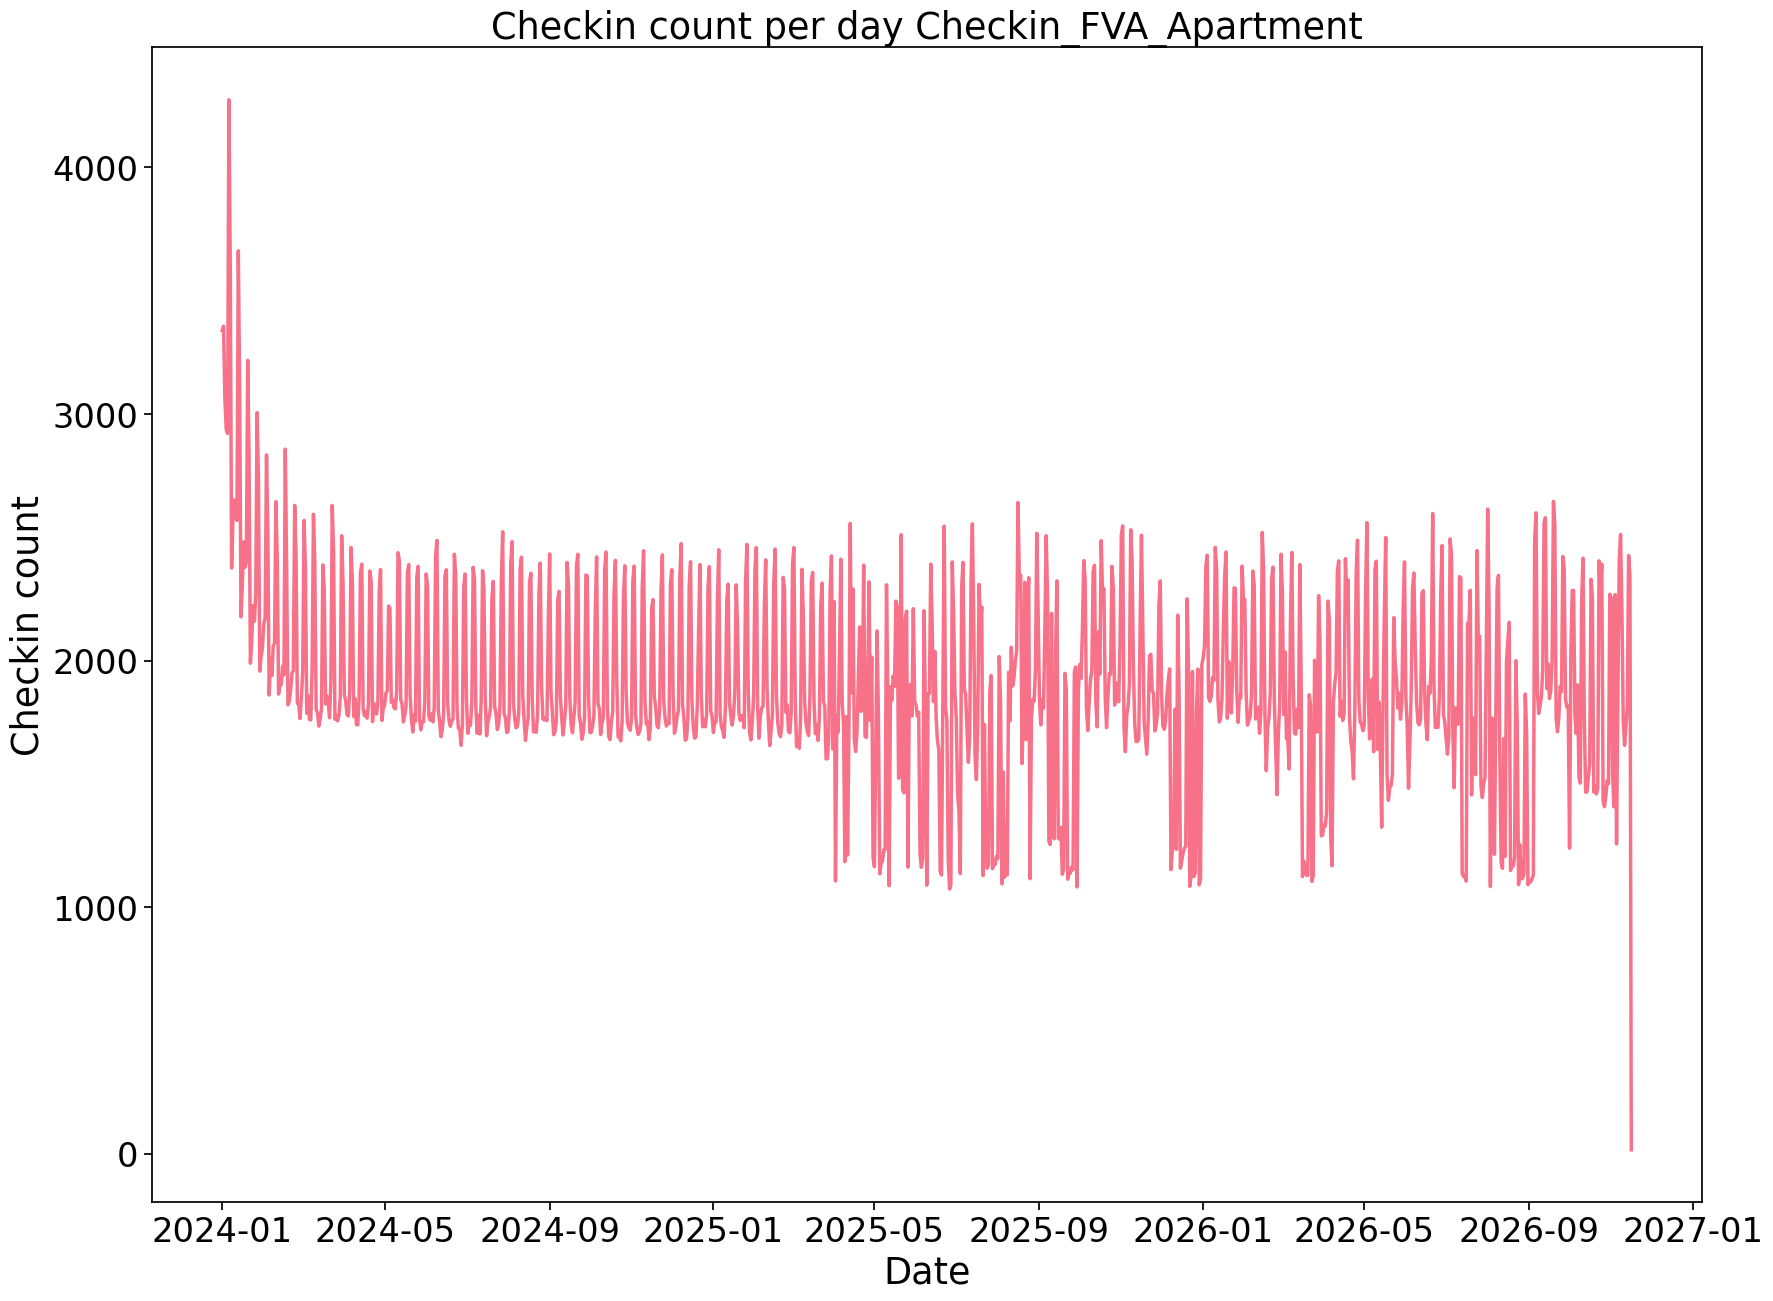

In [6]:
input_files = ['Checkin_ATL.tsv', 'Checkin_ATL_Large.tsv', 'Checkin_BJNG.tsv', 'Checkin_NOLA.tsv', 'Checkin_FVA.tsv']

for input_file in input_files:
    plot_file(input_file)
